# Capstone Final Project - Evaluating the Strength of User Passwords
- __Student:__ Patrick Routh
<br>
- __Cohort:__ Part-Time January 2019
<br>
- __Instructor:__ Brandon Lewis/Eli Thomas
<br>
- __Due:__ November 8, 2019
<br>
- __Blog Post URL:__ https://rickrouth12.github.io/evaluating_password_strength

### Information Security Overview

- Confidentiality - keeping information secret
- Integrity - maintaining accuracy and reliability of data as well as preventing unauthorized users from compromising data and systems
- Availability - ensuring that data and systems are accessible and available when you need them

#### Password

A password is a basic security mechanism that consists of a secret pass phrase created using alphabetic, numeric, alphanumeric and symbolic characters, or a combination. A password is used to restrict access to a system, application or service to only those users who have memorized or stored and/or are authorized to use it.

#### Password Strength 

Password strength is measured by two basic metrics:
- length
- complexity

Security experts reccommend that users create passwords with more than 8 characters and a varied mix of numbers, symbols, upper and lowercase letters.

On a standard keyboard, there are 96 possible characters choosing from A to Z in both upper and lowercase, 0-9, and special characters/symbols. So that means that a password of 8 characters can use any of the 96 character options. 96 to the 8th power results in over 7,200,000,000,000,000 password options to choose from. That number is far beyond the threshold of today's computational power to brute-force or guess all possible combinations seeking out the correct password.

It seems easy enough, however humans generally take shortcuts and choose simple passwords that are easy to remember. This makes it easy to pass the authentication barriers presented to us on a daily basis to access data and applications on our computers and smart phones. Reducing friction is a natural human tendency.

In doing so, we often add meaningful words to our passwords that are often top of mind - a pet name, birthday, favorite type of cake. The addition of these often english words allows hackers to use an automated dictionary search while brute-forcing a password which reduces the number of unknown characters in a password. So that 7,200,000,000,000,000 number drastically reduces to an attainable number for a hacker to test and succeed in finding your password.

#### Password Length and Complexity Analysis

You can see from the chart below that adding an additional character to a password significantly increasing the number of possible character combinations and as a result the amount of time it would take to brute-force a password. The most significant increase in computational time occurs when character complexity is introduced and a password contains more than just lowercase letters.
<br>
<br>
An 8 character password with only lowercase letters used take 2.42 days to guess all possible letter combinations before a hacker would arive at the correct combination. Whereas the same 8 character password that uses capital letters, numbers, and special characters increases that time to 2.1 centuries or 210 years. Suddenly, your password goes from a reasonable amount of time to longer than any human has ever lived!

| Password Length | All Characters | Only Lowercase |
|------|------|------|
| 3 characters | 0.86 minutes | 0.02 seconds |
| 4 characters | 1.36 minutes | 0.046 seconds |
| 5 characters | 2.15 hours | 11.9 seconds |
| 6 characters | 8.51 days | 5.15 minutes |
| 7 characters | 2.21 years  | 2.23 hours |
| 8 characters | 2.1 centuries | 2.42 days |
| 9 characters | 20 millennia | 2.07 months |
| 10 characters | 1,899 millennia  | 4.48 years |
| 11 characters | 180,365 millennia  | 1.16 centuries |
| 12 characters | 17,184,705 millennia  | 3.03 millennia |
| 13 characters | 1,627,797,068 millennia  | 78.7 millennia |
| 14 characters | 154,640,721,434 millennia  | 2,046 millennia |

### IBM Requirements for Passwords

#### Requirements for w3id passwords:
- a password must have a minimum length of 15 and maximum length of 50.
- a password must have a mix of at least 2 character types (uppercase, lowercase, numbers, special characters).
- a password may not be reused until after at least 8 iterations.
- a password must score at least "OK" in the password strength meter. This is based on a calculated score of the password's strength. It is encouraged for users to strengthen their passwords to "Strong".
- a password cannot have spaces at the beginning or end of the password, and it cannot have non-English characters.

#### Tips for creating a strong password:
- Users may use passphrases. A passphrase is a series of words, such that it is long but still easy to memorize. The words in a passphrase may be separated by spaces.
- Avoid using too many dictionary words. For passphrases, try making at least a few of the words non-dictionary words.
- Avoid using common patterns and sequences, such as putting "12345" in your password.
- Use different types of characters (lowercase, uppercase, numbers, and symbols).
- Using common substitutions (such as using '@' instead of 'a') in dictionary words often does not increase the password strength meter's score.

## Problems/Questions
<br>
1. Are passwords providing the level of security that we deserve?
<br>
2. Naive password evaluation tools with basic rules may provide feedback and encourage users to increase the length of a password with more characters, but they fail to signficantly increase the time it would take a hacker to crack it. 
<br>
3. Can we do better to avoid instilling a false sense of security onto users to improve everyone’s overall security and privacy while retaining a positive user experience?

## Solution to Investigate
Leverage machine learning to more accurately classify password strengths and better inform users on the strength of chosen passwords. Today, passwords represent a basic barrier to entry for unauthorized users and integral to establishing a level of data security for today's systems. But, are we doing enough as users to create complex passwords or are we falling short? Are passwords the best authentication tool available?

### Datasets

#### Faizann24 - List of Labeled Passwords
<br>
Source: https://github.com/faizann24/Machine-Learning-based-Password-Strength-Classification
<br>
Number of Records: 65,534

#### havibeenpwned - List of Unlabeled Passwords
<br>
Source: https://github.com/robinske/password-data
<br>
Number of Records: 677,568

Pwned Passwords are 555,278,657 real world passwords previously exposed in data breaches. This exposure makes them unsuitable for ongoing use as they're at much greater risk of being used to take over other accounts. They're searchable online below as well as being downloadable for use in other online systems.

For this project, we used a sample of ~677,000 of the 500+ million real world passwords in the repository.

### Multi-Class Classification
Password Strength - 3 Classes
- Class 1: y = 0 - weak
- Class 2: y = 1 - moderate
- Class 3: y = 2 - strong

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
%matplotlib inline
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from nltk import word_tokenize
from gensim.models import word2vec

import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from statsmodels.formula.api import ols
from scipy import stats

Using TensorFlow backend.
/Users/patrickrouth/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Obtaining the Data

In [2]:
df_UL_passwords_0 = pd.read_csv("password_data/passwords/part-00000-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [3]:
df_UL_passwords_1 = pd.read_csv("password_data/passwords/part-00001-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [4]:
df_UL_passwords_2 = pd.read_csv("password_data/passwords/part-00002-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [5]:
df_UL_passwords_3 = pd.read_csv("password_data/passwords/part-00003-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [6]:
df_UL_passwords_4 = pd.read_csv("password_data/passwords/part-00004-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [7]:
df_UL_passwords_5 = pd.read_csv("password_data/passwords/part-00005-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [8]:
df_UL_passwords_6 = pd.read_csv("password_data/passwords/part-00006-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [9]:
df_UL_passwords_7 = pd.read_csv("password_data/passwords/part-00007-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [10]:
df_UL_passwords_8 = pd.read_csv("password_data/passwords/part-00008-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [11]:
df_UL_passwords_9 = pd.read_csv("password_data/passwords/part-00009-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [12]:
df_UL_passwords_10 = pd.read_csv("password_data/passwords/part-00010-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [13]:
df_UL_passwords_11 = pd.read_csv("password_data/passwords/part-00011-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [14]:
df_UL_passwords_12 = pd.read_csv("password_data/passwords/part-00012-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [15]:
df_UL_passwords_13 = pd.read_csv("password_data/passwords/part-00013-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [16]:
df_UL_passwords_14 = pd.read_csv("password_data/passwords/part-00014-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [17]:
df_UL_passwords_15 = pd.read_csv("password_data/passwords/part-00015-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [18]:
df_UL_passwords_16 = pd.read_csv("password_data/passwords/part-00016-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [19]:
df_UL_passwords_17 = pd.read_csv("password_data/passwords/part-00017-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [20]:
df_UL_passwords_18 = pd.read_csv("password_data/passwords/part-00018-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [21]:
df_UL_passwords_19 = pd.read_csv("password_data/passwords/part-00019-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [22]:
df_UL_passwords_20 = pd.read_csv("password_data/passwords/part-00020-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [23]:
df_UL_passwords_21 = pd.read_csv("password_data/passwords/part-00021-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [24]:
df_UL_passwords_22 = pd.read_csv("password_data/passwords/part-00022-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [25]:
df_UL_passwords_23 = pd.read_csv("password_data/passwords/part-00023-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [26]:
df_UL_passwords_24 = pd.read_csv("password_data/passwords/part-00024-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [27]:
df_UL_passwords_25 = pd.read_csv("password_data/passwords/part-00025-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [28]:
df_UL_passwords_26 = pd.read_csv("password_data/passwords/part-00026-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [29]:
df_UL_passwords_27 = pd.read_csv("password_data/passwords/part-00027-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [30]:
df_UL_passwords_28 = pd.read_csv("password_data/passwords/part-00028-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [31]:
df_UL_passwords_29 = pd.read_csv("password_data/passwords/part-00029-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [32]:
df_UL_passwords_30 = pd.read_csv("password_data/passwords/part-00030-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [33]:
df_UL_passwords_31 = pd.read_csv("password_data/passwords/part-00031-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [34]:
df_UL_passwords_32 = pd.read_csv("password_data/passwords/part-00032-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [35]:
df_UL_passwords_33 = pd.read_csv("password_data/passwords/part-00033-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [36]:
df_UL_passwords_34 = pd.read_csv("password_data/passwords/part-00034-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [37]:
df_UL_passwords_35 = pd.read_csv("password_data/passwords/part-00035-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [38]:
df_UL_passwords_36 = pd.read_csv("password_data/passwords/part-00036-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [39]:
df_UL_passwords_37 = pd.read_csv("password_data/passwords/part-00037-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [40]:
df_UL_passwords_38 = pd.read_csv("password_data/passwords/part-00038-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [41]:
df_UL_passwords_39 = pd.read_csv("password_data/passwords/part-00039-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [42]:
df_UL_passwords_40 = pd.read_csv("password_data/passwords/part-00040-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [43]:
df_UL_passwords_41 = pd.read_csv("password_data/passwords/part-00041-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [44]:
df_UL_passwords_42 = pd.read_csv("password_data/passwords/part-00042-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [45]:
df_UL_passwords_43 = pd.read_csv("password_data/passwords/part-00043-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [46]:
df_UL_passwords_44 = pd.read_csv("password_data/passwords/part-00044-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [47]:
df_UL_passwords_45 = pd.read_csv("password_data/passwords/part-00045-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [48]:
df_UL_passwords_46 = pd.read_csv("password_data/passwords/part-00046-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [49]:
df_UL_passwords_47 = pd.read_csv("password_data/passwords/part-00047-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [50]:
df_UL_passwords_48 = pd.read_csv("password_data/passwords/part-00048-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [51]:
df_UL_passwords_49 = pd.read_csv("password_data/passwords/part-00049-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [52]:
df_UL_passwords_50 = pd.read_csv("password_data/passwords/part-00050-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [53]:
df_UL_passwords_51 = pd.read_csv("password_data/passwords/part-00051-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [54]:
df_UL_passwords_52 = pd.read_csv("password_data/passwords/part-00052-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [55]:
df_UL_passwords_53 = pd.read_csv("password_data/passwords/part-00053-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [56]:
df_UL_passwords_54 = pd.read_csv("password_data/passwords/part-00054-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [57]:
df_UL_passwords_55 = pd.read_csv("password_data/passwords/part-00055-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [58]:
df_UL_passwords_56 = pd.read_csv("password_data/passwords/part-00056-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [59]:
df_UL_passwords_57 = pd.read_csv("password_data/passwords/part-00057-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [60]:
df_UL_passwords_58 = pd.read_csv("password_data/passwords/part-00058-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [61]:
df_UL_passwords_59 = pd.read_csv("password_data/passwords/part-00059-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [62]:
df_UL_passwords_60 = pd.read_csv("password_data/passwords/part-00060-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [63]:
df_UL_passwords_61 = pd.read_csv("password_data/passwords/part-00061-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [64]:
df_UL_passwords_62 = pd.read_csv("password_data/passwords/part-00062-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [65]:
df_UL_passwords_63 = pd.read_csv("password_data/passwords/part-00063-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [66]:
df_UL_passwords_64 = pd.read_csv("password_data/passwords/part-00064-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [67]:
df_UL_passwords_65 = pd.read_csv("password_data/passwords/part-00065-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [68]:
df_UL_passwords_66 = pd.read_csv("password_data/passwords/part-00066-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [69]:
df_UL_passwords_67 = pd.read_csv("password_data/passwords/part-00067-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [70]:
df_UL_passwords_68 = pd.read_csv("password_data/passwords/part-00068-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [71]:
df_UL_passwords_69 = pd.read_csv("password_data/passwords/part-00069-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [72]:
df_UL_passwords_70 = pd.read_csv("password_data/passwords/part-00070-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [73]:
df_UL_passwords_71 = pd.read_csv("password_data/passwords/part-00071-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [74]:
df_UL_passwords_72 = pd.read_csv("password_data/passwords/part-00072-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [75]:
df_UL_passwords_73 = pd.read_csv("password_data/passwords/part-00073-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [76]:
df_UL_passwords_74 = pd.read_csv("password_data/passwords/part-00074-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [77]:
df_UL_passwords_75 = pd.read_csv("password_data/passwords/part-00075-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [78]:
df_UL_passwords_76 = pd.read_csv("password_data/passwords/part-00076-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [79]:
df_UL_passwords_77 = pd.read_csv("password_data/passwords/part-00077-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [80]:
df_UL_passwords_78 = pd.read_csv("password_data/passwords/part-00078-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [81]:
df_UL_passwords_79 = pd.read_csv("password_data/passwords/part-00079-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [82]:
df_UL_passwords_80 = pd.read_csv("password_data/passwords/part-00080-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [83]:
df_UL_passwords_81 = pd.read_csv("password_data/passwords/part-00081-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [84]:
df_UL_passwords_82 = pd.read_csv("password_data/passwords/part-00082-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [85]:
df_UL_passwords_83 = pd.read_csv("password_data/passwords/part-00083-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [86]:
df_UL_passwords_84 = pd.read_csv("password_data/passwords/part-00084-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [87]:
df_UL_passwords_85 = pd.read_csv("password_data/passwords/part-00085-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [88]:
df_UL_passwords_86 = pd.read_csv("password_data/passwords/part-00086-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [89]:
df_UL_passwords_87 = pd.read_csv("password_data/passwords/part-00087-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [90]:
df_UL_passwords_88 = pd.read_csv("password_data/passwords/part-00088-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [91]:
df_UL_passwords_89 = pd.read_csv("password_data/passwords/part-00089-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [92]:
df_UL_passwords_90 = pd.read_csv("password_data/passwords/part-00090-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [93]:
df_UL_passwords_91 = pd.read_csv("password_data/passwords/part-00091-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [94]:
df_UL_passwords_92 = pd.read_csv("password_data/passwords/part-00092-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [95]:
df_UL_passwords_93 = pd.read_csv("password_data/passwords/part-00093-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [96]:
df_UL_passwords_94 = pd.read_csv("password_data/passwords/part-00094-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [97]:
df_UL_passwords_95 = pd.read_csv("password_data/passwords/part-00095-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [98]:
df_UL_passwords_96 = pd.read_csv("password_data/passwords/part-00096-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [99]:
df_UL_passwords_97 = pd.read_csv("password_data/passwords/part-00097-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [100]:
df_UL_passwords_98 = pd.read_csv("password_data/passwords/part-00098-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [101]:
df_UL_passwords_99 = pd.read_csv("password_data/passwords/part-00099-abca9f4b-5795-47ee-8382-f523480a532f.csv")

In [102]:
dataframes_concat_UL = [df_UL_passwords_0, df_UL_passwords_1, df_UL_passwords_2, df_UL_passwords_3, 
                        df_UL_passwords_4, df_UL_passwords_5, df_UL_passwords_6, df_UL_passwords_7, 
                        df_UL_passwords_8, df_UL_passwords_9, df_UL_passwords_10, df_UL_passwords_11, 
                        df_UL_passwords_13, df_UL_passwords_14, df_UL_passwords_15, df_UL_passwords_16, 
                        df_UL_passwords_17, df_UL_passwords_18,
                       df_UL_passwords_19, df_UL_passwords_20, df_UL_passwords_21, df_UL_passwords_22, 
                       df_UL_passwords_23, df_UL_passwords_24, df_UL_passwords_25, df_UL_passwords_26,
                        df_UL_passwords_27, df_UL_passwords_28, df_UL_passwords_29, df_UL_passwords_30,
                       df_UL_passwords_31, df_UL_passwords_32, df_UL_passwords_33, df_UL_passwords_34,
                       df_UL_passwords_35, df_UL_passwords_36, df_UL_passwords_37, df_UL_passwords_38,
                       df_UL_passwords_39, df_UL_passwords_40, df_UL_passwords_41, df_UL_passwords_42,
                        df_UL_passwords_43, df_UL_passwords_44, df_UL_passwords_45, df_UL_passwords_46,
                       df_UL_passwords_47, df_UL_passwords_48, df_UL_passwords_49, df_UL_passwords_50,
                       df_UL_passwords_51, df_UL_passwords_52, df_UL_passwords_53, df_UL_passwords_54,
                       df_UL_passwords_55, df_UL_passwords_56, df_UL_passwords_57, df_UL_passwords_58,
                       df_UL_passwords_59, df_UL_passwords_60, df_UL_passwords_61, df_UL_passwords_62,
                        df_UL_passwords_63, df_UL_passwords_64, df_UL_passwords_65, df_UL_passwords_66,
                       df_UL_passwords_67, df_UL_passwords_68, df_UL_passwords_69, df_UL_passwords_70,
                       df_UL_passwords_71, df_UL_passwords_72, df_UL_passwords_73, df_UL_passwords_74,
                       df_UL_passwords_75, df_UL_passwords_76, df_UL_passwords_77, df_UL_passwords_78,
                       df_UL_passwords_79, df_UL_passwords_80, df_UL_passwords_81, df_UL_passwords_82,
                        df_UL_passwords_83, df_UL_passwords_84, df_UL_passwords_85, df_UL_passwords_86,
                        df_UL_passwords_87, df_UL_passwords_88, df_UL_passwords_89, df_UL_passwords_90,
                       df_UL_passwords_91, df_UL_passwords_92, df_UL_passwords_93, df_UL_passwords_94,
                       df_UL_passwords_95, df_UL_passwords_96, df_UL_passwords_97, df_UL_passwords_98,
                       df_UL_passwords_99]
df_UL_passwords = pd.concat(dataframes_concat_UL)
df_UL_passwords.head()

password                                      hash  count
0    1980290  083040BB6B1D95F2B8AC447B50D21DAB38DAFF16     13
1   tornadof  0A7709AD9837766F20156FF016ABF66F8036ABC1     13
2  vova87654  66221A7691CDC27D9D31071A0CFA0712C100C7D7     13
3   XpKvShrO  4CB7086C94AE4D82E519FF8F98D0DA1DA38DBE53     13
4     tvjgtl  9E1FD26A17D2EBE7C9FD4181EF49424C7091D484     13

# Scrubbing and Cleaning the Data

In [103]:
df_UL_passwords = df_UL_passwords.drop(columns='hash')

In [104]:
df_L_passwords = pd.read_excel("password_data_classified_2.xlsx")
df_L_passwords.head()

password strength Unnamed: 2 Unnamed: 3  Unnamed: 4
0     kzde5577        1        NaN        NaN         NaN
1     kino3434        1        NaN        NaN         NaN
2    visi7k1yr        1        NaN        NaN         NaN
3     megzy123        1        NaN        NaN         NaN
4  lamborghin1        1        NaN        NaN         NaN

In [105]:
df_L_passwords = df_L_passwords.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df_L_passwords.head()

password strength
0     kzde5577        1
1     kino3434        1
2    visi7k1yr        1
3     megzy123        1
4  lamborghin1        1

In [534]:
import sys
!{sys.executable} -m pip install pandas-profiling

  Using cached https://files.pythonhosted.org/packages/45/ad/24a16fa4ba612fb96a3c4bb115a5b9741483f53b66d3d3afd987f20fa227/phik-0.9.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/6f/90e860cba937c174d8b3775729ccc6377eb91f52ad4eeb008e7252a3646d/confuse-1.0.0.tar.gz
     |████████████████████████████████| 8.2MB 693kB/s eta 0:00:01     |████████████▍                   | 3.2MB 173kB/s eta 0:00:29
  Using cached https://files.pythonhosted.org/packages/b3/e7/fcd59e12169de19f0131ff2812077f964c6b960e7c09804d30a7bf2ab461/htmlmin-0.1.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
     |████████████████████████████████| 235kB 754kB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 541kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/64/dc/6f35f114844fb12e38d60c4f3d2441a55baff7043ad4e013777dff55746c/pytest_pylint-0.14.1-py

     |████████████████████████████████| 51kB 379kB/s eta 0:00:011
     |████████████████████████████████| 215kB 271kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 372kB/s eta 0:00:01
  Stored in directory: /Users/patrickrouth/Library/Caches/pip/wheels/37/cf/33/dee85e699e6fde7299b3e234d7e4a45720120b083177a7d078
Successfully built lazy-object-proxy
  Stored in directory: /Users/patrickrouth/Library/Caches/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Stored in directory: /Users/patrickrouth/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /Users/patrickrouth/Library/Caches/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
Successfully built confuse htmlmin wrapt
ERROR: astroid 2.3.3 has requirement six~=1.12, but you'll have six 1.11.0 which i

In [536]:
import pandas_profiling as pp
pp.ProfileReport(df_L_passwords)

In [108]:
print(df_UL_passwords.isna().sum())
print(df_L_passwords.isna().sum())

password    2
count       0
dtype: int64
password    0
strength    0
dtype: int64


In [109]:
df_UL_passwords[df_UL_passwords.password.isna()]

password  count
4181      NaN   3754
4614      NaN  37891

In [110]:
df_UL_passwords = df_UL_passwords.dropna(how='any',axis=0) 

In [111]:
print(df_UL_passwords.isna().sum())
print(df_L_passwords.isna().sum())

password    0
count       0
dtype: int64
password    0
strength    0
dtype: int64


#### Labeled Data: Weak, Moderate, Strong Distribution

In [112]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('mt2gurur@hotmail.com', 0)

In [113]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('canersastim@gmail.com', 0)

In [114]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('drselimcelik@gmail.com', 0)

In [115]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('bursabursa2@hotmail.com', 0)

In [116]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('crazy_boeing@yahoo.com', 0)

In [117]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('octoberwind@mynet.com', 0)

In [118]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('anakonda_252@hotmail.com', 0)

In [119]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('beratmisimi1@gmail.com', 0)

In [120]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('elitebilgisayar26@gmail.com', 0)

In [121]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('mamedov.kenan@mail.ru', 0)

In [122]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('elumre@gmail.com', 0)

In [123]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('elitebilgisayar26@gmail.com', 0)

In [124]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('selimkaratas@windowslive.com', 0)

In [125]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('selim_syl1905@hotmail.com', 0)

In [126]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('boystreet04@gmail.com', 0)

In [127]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('facebookselim4@hotmail.com', 0)

In [128]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('info@kayimoglu.com', 0)

In [129]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('mert_kaya09@hotmail.com', 0)

In [130]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('elitebank44@gmail.com', 0)

In [131]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('cousto@live.com', 0)

In [132]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('mnyk12@hotmail.com', 0)

In [133]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('delioreanxs@hotmail.com', 0)

In [134]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('sado_370@hotmail.com', 0)

In [135]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('djexploit@gmail.com', 0)

In [136]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('arifselim.ask@gmail.com', 0)

In [137]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('imkbticaretmeslek@gmail.co', 0)

In [138]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('kralkotsk@mynet.com', 0)

In [139]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('destek@migmedya.com', 0)

In [140]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('mrcds.grmnt@yahoo.com', 0)

In [141]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('imkbticaretmeslek@gmail.com', 0)

In [142]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('selim.ozmen07@hotmail.com', 0)

In [143]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('bykudelfa@hotmail.com', 0)

In [144]:
df_L_passwords['strength'] = df_L_passwords['strength'].replace('memleketim.info@gmail.com', 0)

#### Unlabeled DataFrame

In [537]:
pp.ProfileReport(df_UL_passwords)

# EDA and Feature Extraction 

In [145]:
df_L_passwords['strength'].value_counts()

1    48653
0     8801
2     8080
Name: strength, dtype: int64

### Searching for Common Passwords

In [589]:
print(len(df_L_passwords['password'].unique())/len(df_L_passwords))

0.9995554124699136


In [593]:
df_L_passwords['password'].value_counts().head(5)

selim              25
Selim               6
UmEGAjULAlOs364     1
q5ecyxa6c           1
jrbndqelf3          1
Name: password, dtype: int64

In [590]:
print(len(df_UL_passwords['password'].unique())/len(df_UL_passwords))

1.0


Nearly all passwords in both data sets are unique, however there are two passwords in df_L_passwords that repeat.
- selim - 25 instances
- Selim - 6 instances

### Password Length

#### Unlabeled Data

In [147]:
df_UL_passwords['password_length'] = df_UL_passwords['password'].str.len()
df_UL_passwords.head()

password  count  password_length
0    1980290     13                7
1   tornadof     13                8
2  vova87654     13                9
3   XpKvShrO     13                8
4     tvjgtl     13                6

In [148]:
df_UL_passwords['password_length'].value_counts().head(5)

6    197196
8    195163
7    124369
9     46926
5     37819
Name: password_length, dtype: int64

In [149]:
df_UL_passwords['password_length'].describe()

count    677566.000000
mean          7.235006
std           1.669318
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          27.000000
Name: password_length, dtype: float64

#### Labeled Data

In [150]:
df_L_passwords['password_length'] = df_L_passwords['password'].str.len()
df_L_passwords.head()

password  strength  password_length
0     kzde5577         1              8.0
1     kino3434         1              8.0
2    visi7k1yr         1              9.0
3     megzy123         1              8.0
4  lamborghin1         1             11.0

#### Addressing null values

In [151]:
df_L_passwords.password_length.isna().sum()

38

In [152]:
df_L_passwords['password'] = df_L_passwords['password'].astype(str)

In [153]:
df_L_passwords['password_length'] = df_L_passwords['password'].str.len()
df_L_passwords.head()

password  strength  password_length
0     kzde5577         1                8
1     kino3434         1                8
2    visi7k1yr         1                9
3     megzy123         1                8
4  lamborghin1         1               11

In [154]:
df_L_passwords.password.isna().sum()

0

### 8-character length Passwords

#### Unlabeled Data

In [155]:
df_UL_passwords['8_length'] = np.where(df_UL_passwords['password'].str.len() >= 8, 1, 0)
df_UL_passwords.head()

password  count  password_length  8_length
0    1980290     13                7         0
1   tornadof     13                8         1
2  vova87654     13                9         1
3   XpKvShrO     13                8         1
4     tvjgtl     13                6         0

In [594]:
df_UL_passwords['8_length'].value_counts()

0    382528
1    294914
Name: 8_length, dtype: int64

#### Labeled Data

In [156]:
df_L_passwords['8_length'] = np.where(df_L_passwords['password'].str.len() >= 8, 1, 0)
df_L_passwords.head()

password  strength  password_length  8_length
0     kzde5577         1                8         1
1     kino3434         1                8         1
2    visi7k1yr         1                9         1
3     megzy123         1                8         1
4  lamborghin1         1               11         1

In [595]:
df_L_passwords['8_length'].value_counts()

1    56424
0     8805
Name: 8_length, dtype: int64

### Special Characters

Regex function to detect use of special characters in a password

In [157]:
import re 

def check_special(string): 
    regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]')    
    if(regex.search(string) == None): 
        return 0 
    else: 
        return 1

#### Unlabeled Data

In [158]:
df_UL_passwords['password'] = df_UL_passwords['password'].astype(str)

In [159]:
df_UL_passwords['special_char'] = df_UL_passwords['password'].apply(check_special)
df_UL_passwords.head()

password  count  password_length  8_length  special_char
0    1980290     13                7         0             0
1   tornadof     13                8         1             0
2  vova87654     13                9         1             0
3   XpKvShrO     13                8         1             0
4     tvjgtl     13                6         0             0

#### Labeled Data

In [160]:
df_L_passwords['password'] = df_L_passwords['password'].astype(str)
df_L_passwords['special_char'] = df_L_passwords['password'].apply(check_special)
df_L_passwords.head()

password  strength  password_length  8_length  special_char
0     kzde5577         1                8         1             0
1     kino3434         1                8         1             0
2    visi7k1yr         1                9         1             0
3     megzy123         1                8         1             0
4  lamborghin1         1               11         1             0

In [161]:
print('Passwords with Special Characters')
print('Unlabeled Passwords:', len(df_UL_passwords[df_UL_passwords['special_char'] == 1]), 
      'of total', len(df_UL_passwords), '=', round(13/6845, 4), '%')
print('Labeled Passwords:', len(df_L_passwords[df_L_passwords['special_char'] == 1]), 
      'of total', len(df_L_passwords), '=', round(1070/65534, 4), '%')

Passwords with Special Characters
Unlabeled Passwords: 1114 of total 677566 = 0.0019 %
Labeled Passwords: 1070 of total 65534 = 0.0163 %


### Numbers

Regex function to detect use of number characters in a password

In [162]:
def check_Numbers(string): 
    array = re.findall(r'[0-9]+', string) 
    if array:
        return 1
    else:
        return 0

#### Unlabeled Data

In [163]:
df_UL_passwords['number_char'] = df_UL_passwords['password'].apply(check_Numbers)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char
0    1980290     13                7         0             0            1
1   tornadof     13                8         1             0            0
2  vova87654     13                9         1             0            1
3   XpKvShrO     13                8         1             0            0
4     tvjgtl     13                6         0             0            0

In [597]:
df_UL_passwords['number_char'].value_counts()

1    398140
0    279302
Name: number_char, dtype: int64

#### Labeled Data

In [164]:
df_L_passwords['number_char'] = df_L_passwords['password'].apply(check_Numbers)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  number_char
0     kzde5577         1                8         1             0            1
1     kino3434         1                8         1             0            1
2    visi7k1yr         1                9         1             0            1
3     megzy123         1                8         1             0            1
4  lamborghin1         1               11         1             0            1

In [596]:
df_L_passwords['number_char'].value_counts()

1    64667
0      562
Name: number_char, dtype: int64

### Checking for letters

Regex function to detect use of letter characters in a password

In [165]:
def check_Letters(string): 
    array = re.findall(r'[a-zA-Z]+', string) 
    if array:
        return 1
    else:
        return 0

#### Unlabeled Data

In [166]:
df_UL_passwords['letter_char'] = df_UL_passwords['password'].apply(check_Letters)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  
0            0  
1            1  
2            1  
3            1  
4            1

In [598]:
df_UL_passwords['letter_char'].value_counts()

1    534873
0    142569
Name: letter_char, dtype: int64

#### Labeled Data

In [167]:
df_L_passwords['letter_char'] = df_L_passwords['password'].apply(check_Letters)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  
0            1            1  
1            1            1  
2            1            1  
3            1            1  
4            1            1

In [599]:
df_L_passwords['letter_char'].value_counts()

1    65032
0      197
Name: letter_char, dtype: int64

### Character Frequency

In [600]:
from collections import Counter 

def char_freq(string): 
    res = Counter(string) 
    return str(res)

In [601]:
df_UL_passwords['char_frequency'] = df_UL_passwords['password'].apply(char_freq)
df_UL_passwords['char_frequency'].head()

0    Counter({'9': 2, '0': 2, '1': 1, '8': 1, '2': 1})
1    Counter({'o': 2, 't': 1, 'r': 1, 'n': 1, 'a': ...
2    Counter({'v': 2, 'o': 1, 'a': 1, '8': 1, '7': ...
3    Counter({'X': 1, 'p': 1, 'K': 1, 'v': 1, 'S': ...
4    Counter({'t': 2, 'v': 1, 'j': 1, 'g': 1, 'l': 1})
Name: char_frequency, dtype: object

In [602]:
df_L_passwords['char_frequency'] = df_L_passwords['password'].apply(char_freq)
df_L_passwords['char_frequency'].head()

0    Counter({'5': 2, '7': 2, 'k': 1, 'z': 1, 'd': ...
1    Counter({'3': 2, '4': 2, 'k': 1, 'i': 1, 'n': ...
2    Counter({'i': 2, 'v': 1, 's': 1, '7': 1, 'k': ...
3    Counter({'m': 1, 'e': 1, 'g': 1, 'z': 1, 'y': ...
4    Counter({'l': 1, 'a': 1, 'm': 1, 'b': 1, 'o': ...
Name: char_frequency, dtype: object

### Character Frequency Breakdown for All Passwords

#### Unlabeled Data

In [169]:
all_UL_passwords_character_frequency = Counter(df_UL_passwords['password'].str.cat())

In [170]:
df_all_UL_passwords_character_frequency = pd.DataFrame.from_dict(all_UL_passwords_character_frequency, 
                                                                 orient='index').reset_index()

In [171]:
df_all_UL_passwords_character_frequency = df_all_UL_passwords_character_frequency.rename(columns=
                                                                                         {'index': 'Character',
                                                                                          0: 'Number of Occurrences'})

In [172]:
df_all_UL_passwords_character_frequency =  df_all_UL_passwords_character_frequency.sort_values(by=['Number of Occurrences'], 
                                                                          ascending=False)

In [173]:
df_all_UL_passwords_character_frequency = df_all_UL_passwords_character_frequency.reset_index()

In [174]:
df_all_UL_passwords_character_frequency = df_all_UL_passwords_character_frequency.drop(['index'], axis=1)

In [175]:
df_all_UL_passwords_character_frequency.head()

Character  Number of Occurrences
0         a                 324425
1         1                 322098
2         e                 273231
3         0                 230161
4         o                 211162

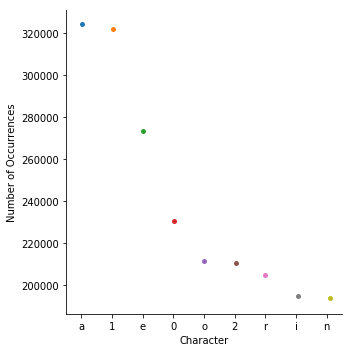

In [176]:
sns.catplot(x='Character',y='Number of Occurrences', data=df_all_UL_passwords_character_frequency[0:9])

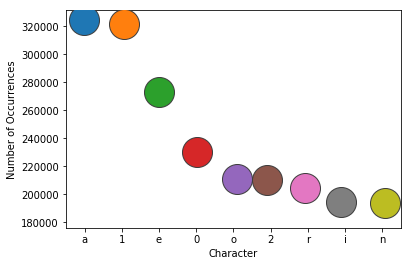

In [177]:
sns.stripplot(x='Character', y='Number of Occurrences',data=df_all_UL_passwords_character_frequency[0:9], 
              linewidth=1, size=30)

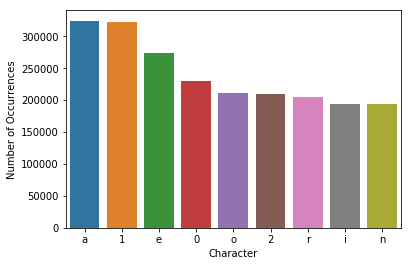

In [178]:
sns.barplot(x='Character', y='Number of Occurrences',data=df_all_UL_passwords_character_frequency[0:9])

#### Labeled Data

In [179]:
all_L_passwords_character_frequency = Counter(df_L_passwords['password'].str.cat())

In [180]:
df_all_L_passwords_character_frequency = pd.DataFrame.from_dict(all_L_passwords_character_frequency, 
                                                                 orient='index').reset_index()

In [181]:
df_all_L_passwords_character_frequency = df_all_L_passwords_character_frequency.rename(columns=
                                                                                         {'index': 'Character',
                                                                                          0: 'Number of Occurrences'})

In [182]:
df_all_L_passwords_character_frequency =  df_all_L_passwords_character_frequency.sort_values(by=['Number of Occurrences'], 
                                                                          ascending=False)

In [183]:
df_all_L_passwords_character_frequency = df_all_L_passwords_character_frequency.reset_index()

In [184]:
df_all_L_passwords_character_frequency = df_all_L_passwords_character_frequency.drop(['index'], axis=1)

In [185]:
df_all_L_passwords_character_frequency.head()

Character  Number of Occurrences
0         a                  39982
1         1                  37655
2         e                  28259
3         2                  27182
4         i                  24764

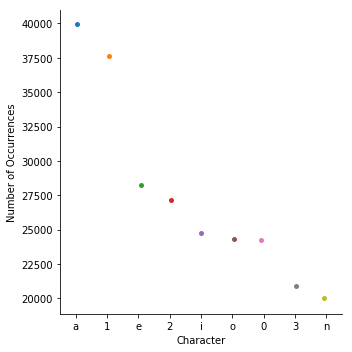

In [186]:
sns.catplot(x='Character',y='Number of Occurrences', data=df_all_L_passwords_character_frequency[0:9])

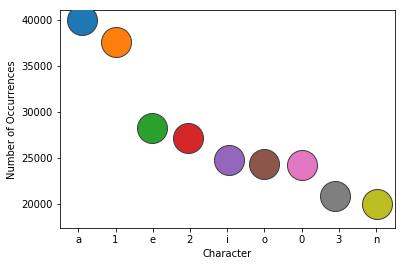

In [187]:
sns.stripplot(x='Character', y='Number of Occurrences',data=df_all_L_passwords_character_frequency[0:9], 
              linewidth=1, size=30)

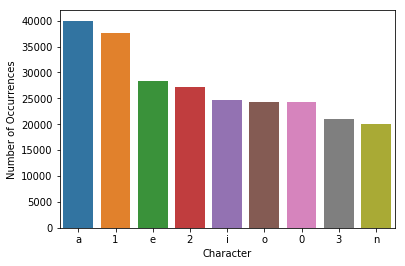

In [188]:
sns.barplot(x='Character',y='Number of Occurrences',data=df_all_L_passwords_character_frequency[0:9])

### Combination of Letters and Numbers

#### Unlabeled Data

In [189]:
df_UL_passwords['8_length_number'] = np.where((df_UL_passwords['8_length'] > 0) & 
                                     (df_UL_passwords.number_char > 0), 1, 0)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  
0            0                0  
1            1                0  
2            1                1  
3            1                0  
4            1                0

In [190]:
df_UL_passwords['8_length_number'].value_counts()

0    489415
1    188151
Name: 8_length_number, dtype: int64

#### Labeled Data

In [191]:
df_L_passwords['8_length_number'] = np.where((df_L_passwords['8_length'] > 0) & 
                                     (df_L_passwords.number_char > 0), 1, 0)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  
0            1            1                1  
1            1            1                1  
2            1            1                1  
3            1            1                1  
4            1            1                1

In [192]:
df_L_passwords['8_length_number'].value_counts()

1    56343
0     9191
Name: 8_length_number, dtype: int64

### Combination of Letters, Numbers, and Special Characters

#### Unlabeled Data

In [193]:
df_UL_passwords['letter_special_number'] = np.where((df_UL_passwords['letter_char'] > 0) & 
                                     (df_UL_passwords.number_char > 0) & (df_UL_passwords.special_char > 0), 1, 0)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  
0            0                0                      0  
1            1                0                      0  
2            1                1                      0  
3            1                0                      0  
4            1                0                      0

In [194]:
df_UL_passwords.letter_special_number.value_counts()

0    677099
1       467
Name: letter_special_number, dtype: int64

#### Labeled Data

In [195]:
df_L_passwords['letter_special_number'] = np.where((df_L_passwords['letter_char'] > 0) & 
                                     (df_L_passwords.number_char > 0) & (df_L_passwords.special_char > 0), 1, 0)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  
0            1            1                1                      0  
1            1            1                1                      0  
2            1            1                1                      0  
3            1            1                1                      0  
4            1            1                1                      0

In [196]:
df_L_passwords.letter_special_number.value_counts()

0    64833
1      701
Name: letter_special_number, dtype: int64

### 8 character password length with Letters, Numbers, and Special Characters

#### Unlabeled Data

In [197]:
df_UL_passwords['letter_special_number_8_length'] = np.where((df_UL_passwords['letter_char'] > 0) 
                                                                    & (df_UL_passwords.number_char > 0) 
                                    & (df_UL_passwords.special_char > 0) 
                                    & (df_UL_passwords['8_length'] > 0), 1, 0)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [198]:
df_UL_passwords['letter_special_number_8_length'].value_counts()

0    677176
1       390
Name: letter_special_number_8_length, dtype: int64

#### Labeled Data

In [199]:
df_L_passwords['letter_special_number_8_length'] = np.where((df_L_passwords['letter_char'] > 0) 
                                                                    & (df_L_passwords.number_char > 0) 
                                    & (df_L_passwords.special_char > 0) 
                                    & (df_L_passwords['8_length'] > 0), 1, 0)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

### Password with Letters, Numbers, and Special Characters

#### Unlabeled Data

In [200]:
df_UL_passwords['letter_special_number'] = np.where((df_UL_passwords['letter_char'] > 0) 
                                                                    & (df_UL_passwords.number_char > 0) 
                                    & (df_UL_passwords.special_char > 0), 1, 0)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [201]:
df_UL_passwords['letter_special_number'].value_counts()

0    677099
1       467
Name: letter_special_number, dtype: int64

#### Labeled Data

In [202]:
df_L_passwords['letter_special_number'] = np.where((df_L_passwords['letter_char'] > 0) 
                                                                    & (df_L_passwords.number_char > 0) 
                                    & (df_L_passwords.special_char > 0), 1, 0)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [203]:
df_L_passwords['letter_special_number'].value_counts()

0    64833
1      701
Name: letter_special_number, dtype: int64

In [204]:
df_L_passwords['letter_special_number_8_length'].value_counts()

0    64835
1      699
Name: letter_special_number_8_length, dtype: int64

### 8+ Character Password with Special Characters

#### Unabeled Data

In [205]:
df_UL_passwords['8_length_special'] = np.where((df_UL_passwords['8_length'] > 0) & 
                                                (df_UL_passwords.special_char > 0), 1, 0)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  
0                               0                 0  
1                               0                 0  
2                               0                 0  
3                               0                 0  
4                               0                 0

In [206]:
df_UL_passwords['8_length_special'].value_counts()

0    676822
1       744
Name: 8_length_special, dtype: int64

#### Labeled Data

In [207]:
df_L_passwords['8_length_special'] = np.where((df_L_passwords['8_length'] > 0) & 
                                                (df_L_passwords.special_char > 0), 1, 0)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  
0                               0                 0  
1                               0                 0  
2                               0                 0  
3                               0                 0  
4                               0                 0

In [208]:
df_L_passwords['8_length_special'].value_counts()

0    64495
1     1039
Name: 8_length_special, dtype: int64

### Password with Upper Case Letters

#### Unlabeled Data

In [209]:
import string 

def is_all_uppercase(a_str): 
    for c in a_str:
        if c not in string.ascii_uppercase:
            return 0
    return 1

In [210]:
df_UL_passwords['password'] = df_UL_passwords['password'].astype(str)

In [211]:
df_UL_passwords['letter_upper'] = df_UL_passwords['password'].apply(is_all_uppercase)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  
0                               0                 0             0  
1                               0                 0             0  
2                               0                 0             0  
3                               0                 0             0  
4                               0                 0             0

In [212]:
df_UL_passwords['letter_upper'].value_counts()

0    668883
1      8683
Name: letter_upper, dtype: int64

In [213]:
df_L_passwords['password'] = df_L_passwords['password'].astype(str)

In [214]:
df_L_passwords['letter_upper'] = df_L_passwords['password'].apply(is_all_uppercase)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  
0                               0                 0             0  
1                               0                 0             0  
2                               0                 0             0  
3                               0                 0             0  
4                               0                 0             0

In [215]:
df_L_passwords['letter_upper'].value_counts()

0    65533
1        1
Name: letter_upper, dtype: int64

In [216]:
def all_lowercase_letters(s):
    rules = [lambda s: all(x.islower() for x in s)
            ]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

In [217]:
def all_digits(s):
    rules = [lambda s: all(x.isnumeric() for x in s)]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

In [218]:
TEST_1_df_UL_passwords = df_UL_passwords.copy(deep=True)

In [219]:
TEST_1_df_UL_passwords['all_lowercase'] = TEST_1_df_UL_passwords['password'].apply(all_lowercase_letters)
TEST_1_df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   all_lowercase  
0              0  
1              1  
2              0  
3              0  
4              1

### Password with Upper and Lowercase Letters

In [220]:
def upper_and_lower_check(s):
    rules = [lambda s: any(x.isupper() for x in s), # must have at least one uppercase
             lambda s: any(x.islower() for x in s),  # must have at least one lowercase
            ]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

#### Unlabeled Data

In [221]:
df_UL_passwords['letter_upper_lower'] = df_UL_passwords['password'].apply(upper_and_lower_check)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0

In [222]:
df_UL_passwords['letter_upper_lower'].value_counts()

0    636760
1     40806
Name: letter_upper_lower, dtype: int64

#### Labeled Data

In [223]:
df_L_passwords['letter_upper_lower'] = df_L_passwords['password'].apply(upper_and_lower_check)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [224]:
df_L_passwords['letter_upper_lower'].value_counts()

0    58061
1     7473
Name: letter_upper_lower, dtype: int64

### 8+ Character Password with Upper Case and Lower Case Letters

In [225]:
def eight_length_upper_lower_check(s):
    rules = [lambda s: any(x.isupper() for x in s), # must have at least one uppercase
             lambda s: any(x.islower() for x in s),  # must have at least one lowercase
             lambda s: len(s) >= 8                   # must be at least 8 characters
            ]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

#### Unlabeled Data

In [226]:
df_UL_passwords['8_length_letter_upper_lower'] = df_UL_passwords['password'].apply(eight_length_upper_lower_check)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  
0                   0                            0  
1                   0                            0  
2                   0                            0  
3                   1                            1  
4                   0                            0

In [227]:
df_UL_passwords['8_length_letter_upper_lower'].value_counts()

0    654664
1     22902
Name: 8_length_letter_upper_lower, dtype: int64

#### Labeled Data

In [228]:
df_L_passwords['8_length_letter_upper_lower'] = df_L_passwords['password'].apply(eight_length_upper_lower_check)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  
0                   0                            0  
1                   0                            0  
2                   0                            0  
3                   0                            0  
4                   0                            0

In [229]:
df_L_passwords['8_length_letter_upper_lower'].value_counts()

0    58075
1     7459
Name: 8_length_letter_upper_lower, dtype: int64

### 8+ Character Password with Upper Case and Lower Case Letters and Numbers

In [230]:
def eight_length_upper_lower_number_check(s):
    rules = [lambda s: any(x.isupper() for x in s), # must have at least one uppercase
             lambda s: any(x.islower() for x in s),  # must have at least one lowercase
             lambda s: any(x.isdigit() for x in s),  # must have at least one digit
             lambda s: len(s) >= 8                    # must be at least 8 characters
            ]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

#### Unlabeled Data

In [231]:
df_UL_passwords['8_length_letter_upper_lower_number'] = df_UL_passwords['password'].apply(eight_length_upper_lower_number_check)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   1                            1   
4                   0                            0   

   8_length_letter_upper_lower_number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [232]:
df_UL_passwords['8_length_letter_upper_lower_number'].value_counts()

0    661673
1     15893
Name: 8_length_letter_upper_lower_number, dtype: int64

#### Labeled Data

In [233]:
df_L_passwords['8_length_letter_upper_lower_number'] = df_L_passwords['password'].apply(eight_length_upper_lower_number_check)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   8_length_letter_upper_lower_number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [234]:
df_L_passwords['8_length_letter_upper_lower_number'].value_counts()

0    58095
1     7439
Name: 8_length_letter_upper_lower_number, dtype: int64

### 8+ Character Password with Upper Case and Lower Case Letters and Special Characters

In [235]:
def eight_length_upper_lower_special_check(s):
    rules = [lambda s: any(x.isupper() for x in s), # must have at least one uppercase
             lambda s: any(x.islower() for x in s),  # must have at least one lowercase
             lambda s: any(x.isdigit() for x in s),  # must have at least one digit
             lambda s: len(s) >= 8                    # must be at least 8 characters
            ]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

#### Unlabeled Data

In [236]:
df_UL_passwords['8_length_letter_upper_lower_number'] = df_UL_passwords['password'].apply(eight_length_upper_lower_number_check)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   1                            1   
4                   0                            0   

   8_length_letter_upper_lower_number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [237]:
df_UL_passwords['8_length_letter_upper_lower_number'].value_counts()

0    661673
1     15893
Name: 8_length_letter_upper_lower_number, dtype: int64

#### Labeled Data

In [238]:
df_L_passwords['8_length_letter_upper_lower_number'] = df_L_passwords['password'].apply(eight_length_upper_lower_number_check)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   8_length_letter_upper_lower_number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [239]:
df_L_passwords['8_length_letter_upper_lower_number'].value_counts()

0    58095
1     7439
Name: 8_length_letter_upper_lower_number, dtype: int64

### 8+ Character Password with Upper Case and Lower Case Letters, Special Characters, and Numbers

In [240]:
def eight_length_upper_lower_number_check(s):
    rules = [lambda s: any(x.isupper() for x in s), # must have at least one uppercase
             lambda s: any(x.islower() for x in s),  # must have at least one lowercase
             lambda s: any(x.isdigit() for x in s),  # must have at least one digit
             lambda s: len(s) >= 8                    # must be at least 8 characters
            ]
    if all(rule(s) for rule in rules):
        return 1
    else:
        return 0

#### Unlabeled Data

In [241]:
df_UL_passwords['8_length_letter_upper_lower_number'] = df_UL_passwords['password'].apply(eight_length_upper_lower_number_check)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   1                            1   
4                   0                            0   

   8_length_letter_upper_lower_number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [242]:
df_UL_passwords['8_length_letter_upper_lower_number'].value_counts()

0    661673
1     15893
Name: 8_length_letter_upper_lower_number, dtype: int64

#### Labeled Data

In [243]:
df_L_passwords['8_length_letter_upper_lower_number'] = df_L_passwords['password'].apply(eight_length_upper_lower_number_check)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   8_length_letter_upper_lower_number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [244]:
df_L_passwords['8_length_letter_upper_lower_number'].value_counts()

0    58095
1     7439
Name: 8_length_letter_upper_lower_number, dtype: int64

### Password with Unique Characters

In [245]:
def isUniqueChars(st): 

    if len(st) > 256: 
        return 0
    char_set = [False] * 128
    for i in range(0, len(st)): 
        val = ord(st[i]) 
        if char_set[val]:
            return 0
        char_set[val] = True
    return 1

#### Unlabeled Data

In [246]:
df_UL_passwords['unique_char'] = df_UL_passwords['password'].apply(isUniqueChars)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   1                            1   
4                   0                            0   

   8_length_letter_upper_lower_number  unique_char  
0                                   0            0  
1                                   0            0  
2                                   0            0  
3                                   0            1  
4                                   0            0

In [247]:
df_UL_passwords['unique_char'].value_counts()

0    476406
1    201160
Name: unique_char, dtype: int64

### Sequence Matching

In [251]:
def longestSubstrings(s): 
      
    longest_letterSeq = '' 
    longest_digitSeq = '' 
    i = 0
    while(i<len(s)): 
          
        curr_letterSeq = '' 
        curr_digitSeq = '' 
          
        while(i<len(s) and s[i].isalpha()): 
            curr_letterSeq += s[i] 
            i+= 1
  
        while(i<len(s) and s[i].isdigit()): 
            curr_digitSeq += s[i] 
            i+= 1
  
           
        if(i< len(s) and not(s[i].isdigit())  
                     and not(s[i].isalpha())) : 
            i+= 1
          
        if(len(curr_letterSeq) > len(longest_letterSeq) ): 
            longest_letterSeq = curr_letterSeq 
              
        if(len(curr_digitSeq) > len(longest_digitSeq) ): 
            longest_digitSeq = curr_digitSeq 
          
    return longest_letterSeq, longest_digitSeq 

In [252]:
def consec_sequence_5(s): 
      
    longest_letterSeq = '' 
    longest_digitSeq = '' 
    i = 0
    while(i<len(s)): 
          
        curr_letterSeq = '' 
        curr_digitSeq = '' 
          
        while(i<len(s) and s[i].isalpha()): 
            curr_letterSeq += s[i] 
            i+= 1
  
        while(i<len(s) and s[i].isdigit()): 
            curr_digitSeq += s[i] 
            i+= 1
  
        if(i< len(s) and not(s[i].isdigit())  
                     and not(s[i].isalpha())) : 
            i+= 1
          
        if(len(curr_letterSeq) > len(longest_letterSeq) ): 
            longest_letterSeq = curr_letterSeq 
              
        if(len(curr_digitSeq) > len(longest_digitSeq) ): 
            longest_digitSeq = curr_digitSeq 
          
        if(len(longest_letterSeq) > 4 ):
            return 1

        if(len(longest_digitSeq) > 4 ):
            longest_sequence = longest_letterSeq
            return 1
            
    return 0 

#### Unlabeled Data

In [253]:
df_UL_passwords['longest_sequences'] = df_UL_passwords['password'].apply(longestSubstrings)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   1                            1   
4                   0                            0   

   8_length_letter_upper_lower_number  unique_char longest_sequences  
0                                   0            0       (, 1980290)  
1                                   0            0      (tornadof, )  
2                                   0            0     (vova, 87654)  
3                                   0            1      (XpKvShrO, )  
4                                   0            0        (tvjgtl, )

In [254]:
df_UL_passwords['consecutive_sequence_5'] = df_UL_passwords['password'].apply(consec_sequence_5)
df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   1                            1   
4                   0                            0   

   8_length_letter_upper_lower_number  unique_char longest_sequences  \
0                                   0            0       (, 1980290)   
1                                   0            0      (tornadof, )   
2                                   0            0     (vova, 87654)   
3                                   0            1      (XpKvShrO, )   
4                                   0            0        (tvjgtl, )   

   consecutive_sequence_5  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

#### Labeled Data

In [255]:
df_L_passwords['longest_sequences'] = df_L_passwords['password'].apply(longestSubstrings)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   8_length_letter_upper_lower_number longest_sequences  
0                                   0      (kzde, 5577)  
1                                   0      (kino, 3434)  
2                                   0         (visi, 7)  
3                                   0      (megzy, 123)  
4                                   0   (lamborghin, 1)

In [256]:
df_L_passwords['consecutive_sequence_5'] = df_L_passwords['password'].apply(consec_sequence_5)
df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   8_length_letter_upper_lower_number longest_sequences  \
0                                   0      (kzde, 5577)   
1                                   0      (kino, 3434)   
2                                   0         (visi, 7)   
3                                   0      (megzy, 123)   
4                                   0   (lamborghin, 1)   

   consecutive_sequence_5  
0                       0  
1                       0  
2                       0  
3                       1  
4                       1

## Features

#### Password Length
integer value representing the number of characters in a password string

#### Password with Special Character
password includes at least one special character (!@#$%^&*+=)

#### Password with Number Character
password includes at least one number

#### Password with Letter Character
password includes at least one letter

#### Password with Letters, Special Characters, and Numbers
password includes at least one letter, number, and special character

#### Password with Upper Case and Lower Case Letters
password includes at least one uppercase and one lowercase letter

#### 8+ Character Password
password with at least 8 characters in length

#### 8+ Character Password with Number
password with at least 8 characters in length and has at least one number

#### 8+ Character Password with Special Characters
password with at least 8 characters in length and at least one special character

#### 8+ Character Password with Letters, Special Characters, and Numbers
password with at least 8 characters in length and at least one letter, one number, and one special character

#### 8+ Character Password with Upper Case and Lower Case Letters
password with at least 8 characters in length and at least one uppercase and lowercase letter

#### 8+ Character Password with Upper Case and Lower Case Letters and Numbers
password with at least 8 characters in length, at least one uppercase and lowercase letter, and a number

#### 8+ Character Password with Upper Case and Lower Case Letters and Special Characters
password with at least 8 characters in length, at least one uppercase and lowercase letter, and a special character

#### 8+ Character Password with Upper Case and Lower Case Letters, Special Characters, and Numbers
password with at least 8 characters in length, at least one uppercase and lowercase letter, a number, and a special character

#### Longest Sequence of Consecutive Character Types
password contains sequences of consecutive character types such as letters or numbers, the longest alpha and numerica sequences are captured in this feature

#### Passwords with 5 or More Consecutive Characters of the Same Type
password with at 5 consecutive characters of the same type (letters or numbers)

### Data Analysis

In [257]:
df_UL_passwords.describe()

count  password_length       8_length   special_char  \
count  6.775660e+05    677566.000000  677566.000000  677566.000000   
mean   1.196691e+03         7.235006       0.435438       0.001644   
std    2.919622e+04         1.669318       0.495815       0.040514   
min    1.200000e+01         1.000000       0.000000       0.000000   
25%    4.800000e+01         6.000000       0.000000       0.000000   
50%    1.860000e+02         7.000000       0.000000       0.000000   
75%    7.040000e+02         8.000000       1.000000       0.000000   
max    2.076034e+07        27.000000       1.000000       1.000000   

         number_char    letter_char  8_length_number  letter_special_number  \
count  677566.000000  677566.000000    677566.000000          677566.000000   
mean        0.587702       0.789559         0.277687               0.000689   
std         0.492249       0.407623         0.447858               0.026244   
min         0.000000       0.000000         0.000000               0.000000   
25%         0.000000       1.000000         0.000000               0.000000   
50%         1.000000       1.000000         0.000000               0.000000   
75%         1.000000       1.000000         1.000000               0.000000   
max         1.000000       1.000000         1.000000               1.000000   

       letter_special_number_8_length  8_length_special   letter_upper  \
count                   677566.000000     677566.000000  677566.000000   
mean                         0.000576          0.001098       0.012815   
std                          0.023985          0.033119       0.112476   
min                          0.000000          0.000000       0.000000   
25%                          0.000000          0.000000       0.000000   
50%                          0.000000          0.000000       0.000000   
75%                          0.000000          0.000000       0.000000   
max                          1.000000          1.000000       1.000000   

       letter_upper_lower  8_length_letter_upper_lower  \
count       677566.000000                677566.000000   
mean             0.060224                     0.033800   
std              0.237902                     0.180715   
min              0.000000                     0.000000   
25%              0.000000                     0.000000   
50%              0.000000                     0.000000   
75%              0.000000                     0.000000   
max              1.000000                     1.000000   

       8_length_letter_upper_lower_number    unique_char  \
count                       677566.000000  677566.000000   
mean                             0.023456       0.296886   
std                              0.151347       0.456886   
min                              0.000000       0.000000   
25%                              0.000000       0.000000   
50%                              0.000000       0.000000   
75%                              0.000000       1.000000   
max                              1.000000       1.000000   

       consecutive_sequence_5  
count           677566.000000  
mean                 0.847439  
std                  0.359564  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  1.000000  
max                  1.000000

In [258]:
df_L_passwords.describe()

strength  password_length      8_length  special_char  \
count  65534.000000     65534.000000  65534.000000  65534.000000   
mean       0.988998         9.981674      0.865642      0.016327   
std        0.507419         2.905657      0.341039      0.126732   
min        0.000000         2.000000      0.000000      0.000000   
25%        1.000000         8.000000      1.000000      0.000000   
50%        1.000000         9.000000      1.000000      0.000000   
75%        1.000000        11.000000      1.000000      0.000000   
max        2.000000       220.000000      1.000000      1.000000   

        number_char   letter_char  8_length_number  letter_special_number  \
count  65534.000000  65534.000000     65534.000000           65534.000000   
mean       0.991379      0.996979         0.859752               0.010697   
std        0.092451      0.054884         0.347247               0.102871   
min        0.000000      0.000000         0.000000               0.000000   
25%        1.000000      1.000000         1.000000               0.000000   
50%        1.000000      1.000000         1.000000               0.000000   
75%        1.000000      1.000000         1.000000               0.000000   
max        1.000000      1.000000         1.000000               1.000000   

       letter_special_number_8_length  8_length_special  letter_upper  \
count                    65534.000000      65534.000000  65534.000000   
mean                         0.010666          0.015854      0.000015   
std                          0.102726          0.124913      0.003906   
min                          0.000000          0.000000      0.000000   
25%                          0.000000          0.000000      0.000000   
50%                          0.000000          0.000000      0.000000   
75%                          0.000000          0.000000      0.000000   
max                          1.000000          1.000000      1.000000   

       letter_upper_lower  8_length_letter_upper_lower  \
count        65534.000000                 65534.000000   
mean             0.114032                     0.113819   
std              0.317853                     0.317593   
min              0.000000                     0.000000   
25%              0.000000                     0.000000   
50%              0.000000                     0.000000   
75%              0.000000                     0.000000   
max              1.000000                     1.000000   

       8_length_letter_upper_lower_number  consecutive_sequence_5  
count                        65534.000000            65534.000000  
mean                             0.113514                0.835108  
std                              0.317222                0.371085  
min                              0.000000                0.000000  
25%                              0.000000                1.000000  
50%                              0.000000                1.000000  
75%                              0.000000                1.000000  
max                              1.000000                1.000000

### Password Analysis

In [259]:
BAD_PWRDS = TEST_1_df_UL_passwords[(TEST_1_df_UL_passwords['all_lowercase'] == 1) & 
                      (TEST_1_df_UL_passwords['password_length'] < 9)]
len(BAD_PWRDS)

217626

In [260]:
FINE_PWRDS_1 = TEST_1_df_UL_passwords[(TEST_1_df_UL_passwords['all_lowercase'] == 0) & 
                      (TEST_1_df_UL_passwords['password_length'] < 6)]
len(FINE_PWRDS_1)

28724

In [261]:
SHORT_PWRDS_1 = TEST_1_df_UL_passwords[(TEST_1_df_UL_passwords['all_lowercase'] == 0) &
                                       (TEST_1_df_UL_passwords['password_length'] < 6)]
len(SHORT_PWRDS_1)

28724

In [262]:
len(SHORT_PWRDS_1)/len(df_UL_passwords)

0.04239291818066432

In [263]:
len(BAD_PWRDS)/len(df_UL_passwords)

0.32118789903861766

In [264]:
TEST_2_df_L_passwords = df_L_passwords.copy(deep=True)

In [265]:
TEST_2_df_L_passwords['all_lowercase'] = TEST_2_df_L_passwords['password'].apply(all_lowercase_letters)
TEST_2_df_L_passwords.head()

password  strength  password_length  8_length  special_char  \
0     kzde5577         1                8         1             0   
1     kino3434         1                8         1             0   
2    visi7k1yr         1                9         1             0   
3     megzy123         1                8         1             0   
4  lamborghin1         1               11         1             0   

   number_char  letter_char  8_length_number  letter_special_number  \
0            1            1                1                      0   
1            1            1                1                      0   
2            1            1                1                      0   
3            1            1                1                      0   
4            1            1                1                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   letter_upper_lower  8_length_letter_upper_lower  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   8_length_letter_upper_lower_number longest_sequences  \
0                                   0      (kzde, 5577)   
1                                   0      (kino, 3434)   
2                                   0         (visi, 7)   
3                                   0      (megzy, 123)   
4                                   0   (lamborghin, 1)   

   consecutive_sequence_5  all_lowercase  
0                       0              0  
1                       0              0  
2                       0              0  
3                       1              0  
4                       1              0

In [266]:
BAD_PWRDS_2 = TEST_2_df_L_passwords[(TEST_2_df_L_passwords['all_lowercase'] == 1) & 
                      (TEST_2_df_L_passwords['password_length'] < 9)]
len(BAD_PWRDS_2)

43

In [267]:
len(BAD_PWRDS_2)/len(df_L_passwords)

0.0006561479537339396

In [268]:
TEST_1_df_UL_passwords['all_numeric'] = TEST_1_df_UL_passwords['password'].apply(all_digits)
TEST_1_df_UL_passwords.head()

password  count  password_length  8_length  special_char  number_char  \
0    1980290     13                7         0             0            1   
1   tornadof     13                8         1             0            0   
2  vova87654     13                9         1             0            1   
3   XpKvShrO     13                8         1             0            0   
4     tvjgtl     13                6         0             0            0   

   letter_char  8_length_number  letter_special_number  \
0            0                0                      0   
1            1                0                      0   
2            1                1                      0   
3            1                0                      0   
4            1                0                      0   

   letter_special_number_8_length  8_length_special  letter_upper  \
0                               0                 0             0   
1                               0                 0             0   
2                               0                 0             0   
3                               0                 0             0   
4                               0                 0             0   

   all_lowercase  all_numeric  
0              0            1  
1              1            0  
2              0            0  
3              0            0  
4              1            0

In [269]:
BAD_NUM_PWRDS = TEST_1_df_UL_passwords[TEST_1_df_UL_passwords['all_numeric'] == 1]
len(BAD_NUM_PWRDS)

142370

In [270]:
len(BAD_NUM_PWRDS)/len(df_UL_passwords)

0.21011975217174417

In [271]:
(len(BAD_NUM_PWRDS)+len(BAD_PWRDS))/len(df_UL_passwords)

0.5313076512103618

In [272]:
len(df_UL_passwords)

677566

In [273]:
FINE_PWRDS_2 = TEST_1_df_UL_passwords[(TEST_1_df_UL_passwords['all_numeric'] == 0) & 
                                      (TEST_1_df_UL_passwords['all_lowercase'] == 0) &
                                       (TEST_1_df_UL_passwords['password_length'] >= 6)]
len(FINE_PWRDS_2)

273393

In [274]:
BEST_PWRDS = df_UL_passwords[(df_UL_passwords['8_length_letter_upper_lower_number'] == 1) &
                             (df_UL_passwords['letter_special_number_8_length'] == 1)]
print(len(BEST_PWRDS))

126


In [275]:
GooD_PWRDS = df_UL_passwords[df_UL_passwords['letter_special_number_8_length'] == 1]
print(len(GooD_PWRDS))

390


In [276]:
df_L_passwords[df_L_passwords['8_length_letter_upper_lower_number'] > 0].strength.value_counts()

2    7434
1       5
Name: strength, dtype: int64

In [277]:
print(len(df_L_passwords[df_L_passwords.strength == 0]))
print(len(df_L_passwords[df_L_passwords.strength == 1]))
print(len(df_L_passwords[df_L_passwords.strength > 1]))

8801
48653
8080


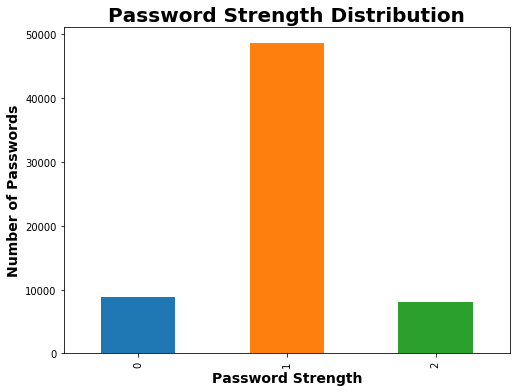

In [278]:
fig = plt.figure(figsize=(8,6))
df_L_passwords.groupby('strength').password.count().plot.bar(ylim=0)
plt.ylabel('Number of Passwords', fontsize=14, fontweight='bold')
plt.xlabel('Password Strength', fontsize=14, fontweight='bold')
plt.title('Password Strength Distribution', fontsize=20, fontweight='bold')
plt.show()

In [279]:
df_L_passwords.strength.value_counts()

1    48653
0     8801
2     8080
Name: strength, dtype: int64

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.
<br>
However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

## Histograms and Checking for Multicollinearity

### Labeled Data

In [280]:
df_L_passwords.columns

Index(['password', 'strength', 'password_length', '8_length', 'special_char',
       'number_char', 'letter_char', '8_length_number',
       'letter_special_number', 'letter_special_number_8_length',
       '8_length_special', 'letter_upper', 'letter_upper_lower',
       '8_length_letter_upper_lower', '8_length_letter_upper_lower_number',
       'longest_sequences', 'consecutive_sequence_5'],
      dtype='object')

In [281]:
len(df_L_passwords.columns)

17

In [282]:
df_L_passwords = df_L_passwords[df_L_passwords['password_length'] < 20]

In [283]:
df_L_passwords_features_1 = df_L_passwords.drop(columns=['password', 'strength', 'longest_sequences'])

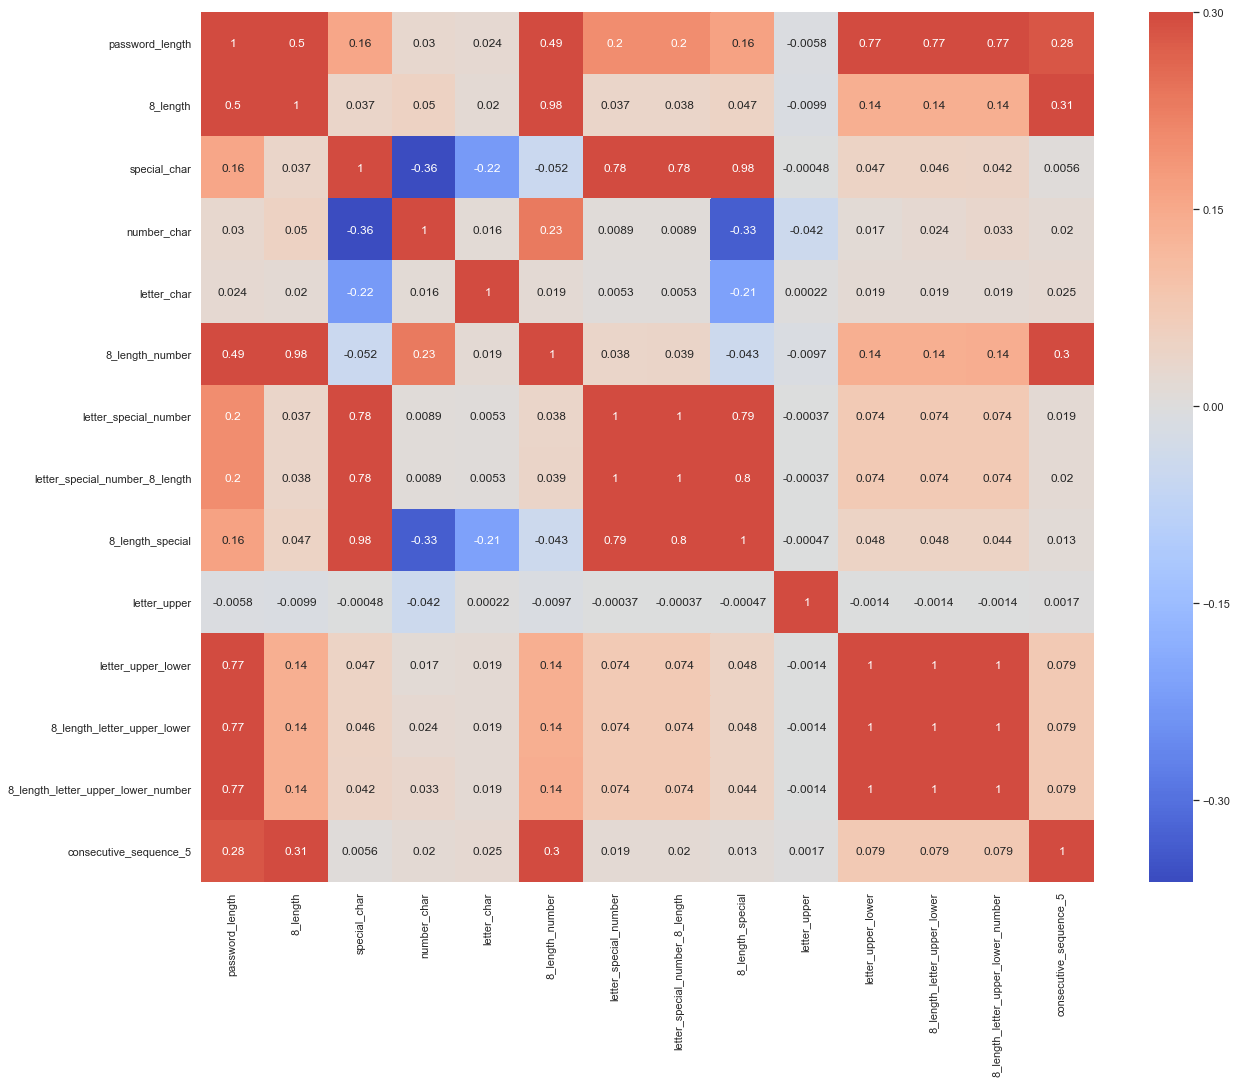

In [284]:
sns.set(style="white")
corr = df_L_passwords_features_1.corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cmap="coolwarm", vmax=.3, center=0, annot=True)

#### Visualizing the Features - Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c36e272b0>,
      dtype=object)

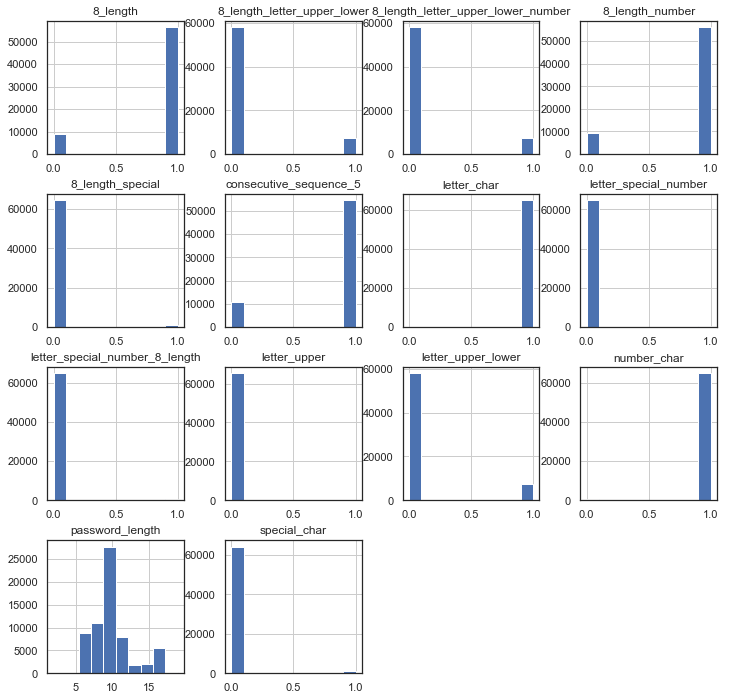

In [285]:
df_L_passwords_features_1.hist(figsize=(12,12))

Text(0.5, 1.0, 'Password Length Evaluation')

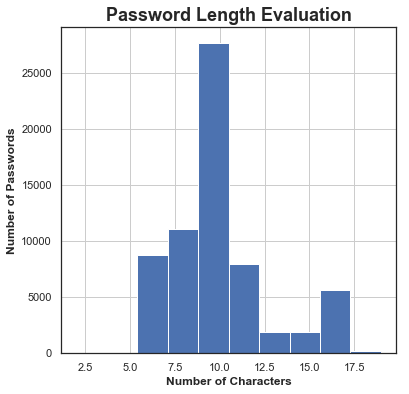

In [478]:
df_L_passwords_features_1['password_length'].hist(figsize=(6,6))
plt.xlabel('Number of Characters', fontweight='bold')
plt.ylabel('Number of Passwords', fontweight='bold')
plt.title('Password Length Evaluation', fontsize=18, fontweight='bold')

### Unlabeled Data

In [287]:
df_UL_passwords.columns

Index(['password', 'count', 'password_length', '8_length', 'special_char',
       'number_char', 'letter_char', '8_length_number',
       'letter_special_number', 'letter_special_number_8_length',
       '8_length_special', 'letter_upper', 'letter_upper_lower',
       '8_length_letter_upper_lower', '8_length_letter_upper_lower_number',
       'unique_char', 'longest_sequences', 'consecutive_sequence_5'],
      dtype='object')

In [288]:
len(df_UL_passwords.columns)

18

In [289]:
df_UL_passwords = df_UL_passwords[df_UL_passwords['password_length'] < 20]

In [290]:
df_UL_passwords_features_1 = df_UL_passwords.drop(columns=['password', 'count', 'unique_char', 
                                                           'longest_sequences'])

#### Checking for Multicollinearity

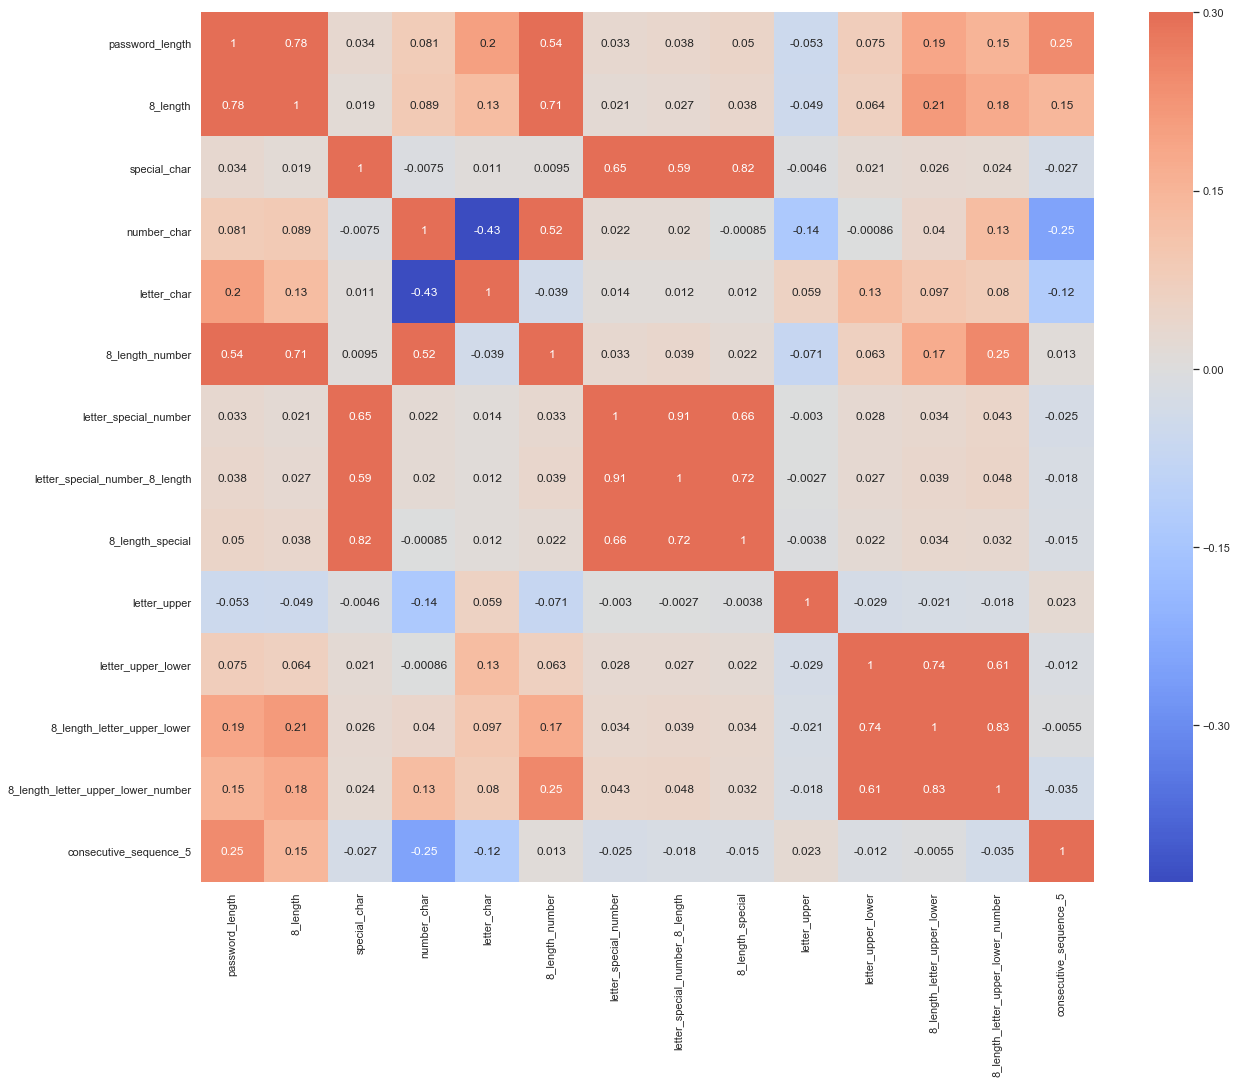

In [291]:
sns.set(style="white")
corr = df_UL_passwords_features_1.corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cmap="coolwarm", vmax=.3, center=0, annot=True)

### Candidates for Removal
- 8+ Character Password
- Password with Upper Case and Lower Case Letter
- 8+ Character Password with Special Characters
- Password with Letters, Special Characters, and Numbers
- 8+ Character Password with Letters, Special Characters, and Numbers

#### Visualizing the Features - Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c37066630>,
      dtype=object)

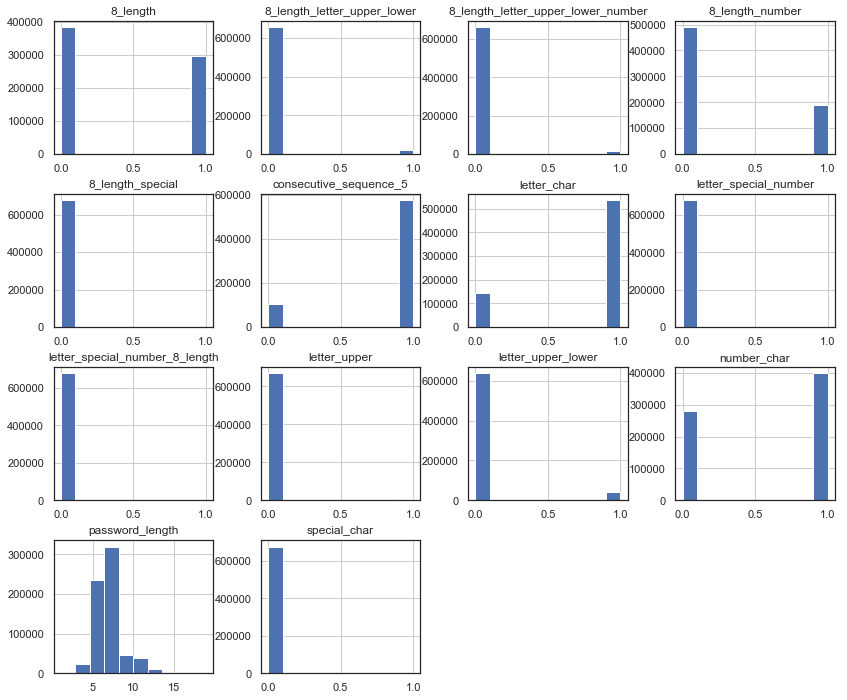

In [292]:
df_UL_passwords_features_1.hist(figsize=(14,12))

Text(0.5, 1.0, 'Password Length Evaluation')

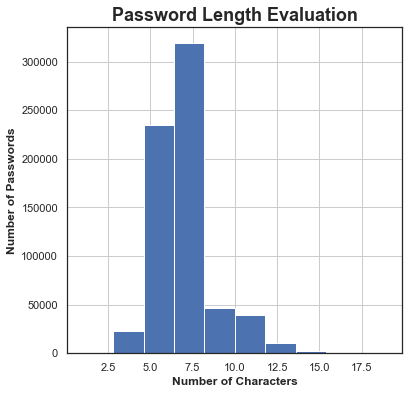

In [477]:
df_UL_passwords_features_1['password_length'].hist(figsize=(6,6))
plt.xlabel('Number of Characters', fontweight='bold')
plt.ylabel('Number of Passwords', fontweight='bold')
plt.title('Password Length Evaluation', fontsize=18, fontweight='bold')

In [482]:
new_df_TEST = pd.concat([df_UL_passwords_features_1, df_L_passwords_features_1])
print(len(new_df_TEST))
new_df_TEST.head()

742671


password_length  8_length  special_char  number_char  letter_char  \
0                7         0             0            1            0   
1                8         1             0            0            1   
2                9         1             0            1            1   
3                8         1             0            0            1   
4                6         0             0            0            1   

   8_length_number  letter_special_number  letter_special_number_8_length  \
0                0                      0                               0   
1                0                      0                               0   
2                1                      0                               0   
3                0                      0                               0   
4                0                      0                               0   

   8_length_special  letter_upper  letter_upper_lower  \
0                 0             0                   0   
1                 0             0                   0   
2                 0             0                   0   
3                 0             0                   1   
4                 0             0                   0   

   8_length_letter_upper_lower  8_length_letter_upper_lower_number  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            1                                   0   
4                            0                                   0   

   consecutive_sequence_5  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

Text(0.5, 1.0, 'Password Length Evaluation')

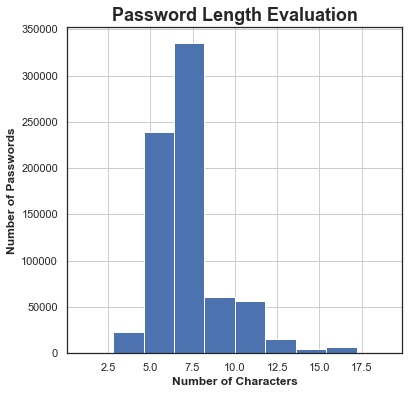

In [484]:
new_df_TEST['password_length'].hist(figsize=(6,6))
plt.xlabel('Number of Characters', fontweight='bold')
plt.ylabel('Number of Passwords', fontweight='bold')
plt.title('Password Length Evaluation', fontsize=18, fontweight='bold')

# Modeling - Machine Learning - Multiclass Classification

In [294]:
df_L_passwords_features_1.columns

Index(['password_length', '8_length', 'special_char', 'number_char',
       'letter_char', '8_length_number', 'letter_special_number',
       'letter_special_number_8_length', '8_length_special', 'letter_upper',
       'letter_upper_lower', '8_length_letter_upper_lower',
       '8_length_letter_upper_lower_number', 'consecutive_sequence_5'],
      dtype='object')

In [603]:
len(df_L_passwords_features_1.columns)

14

In [ ]:
- 8+ Character Password
- Password with Upper Case and Lower Case Letter
- 8+ Character Password with Special Characters
- Password with Letters, Special Characters, and Numbers
- 8+ Character Password with Letters, Special Characters, and Numbers

In [604]:
df_L_passwords_features_3 = df_L_passwords_features_1.drop(columns=['8_length', 
                                                                    'letter_upper_lower', 
                                                                    '8_length_special', 
                                                                    'letter_special_number', 
                                                                   'letter_special_number_8_length'])

In [605]:
len(df_L_passwords_features_3.columns)

9

In [606]:
print(len(df_L_passwords['strength']))
print(len(df_L_passwords_features_3))

65229
65229


In [607]:
y = df_L_passwords['strength']
X = df_L_passwords_features_3

#### Train, Test Split

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

### Logistic Regression

In [609]:
# Logistic Regression - multi-class regression
logist_reg_round_1 = LogisticRegression(penalty='l2', multi_class='ovr')
# training data for X and y
logist_reg_round_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [610]:
# Testing accuracy with testing data
print(logist_reg_round_1.score(X_test, y_test))

0.9949409780775716


In [611]:
from sklearn import metrics

In [612]:
y_pred = logist_reg_round_1.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 66
Accuracy: 0.99


### Random Forest

In [613]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
train_preds_forest_1 = forest.predict(X_train)
test_preds_forest_1 = forest.predict(X_test)
train_accuracy_forest_1 = accuracy_score(y_train, train_preds_forest_1)
test_accuracy_forest_1 = accuracy_score(y_test, test_preds_forest_1)
report_forest_1 = classification_report(y_test, test_preds_forest_1)

In [614]:
print('Random Forest - Round 1')
print('--------------------')
print('Training Accuracy:', train_accuracy_forest_1*100, '%')
print('Test Accuracy:', test_accuracy_forest_1*100, '%')
print('\nClassification Report:')
print(report_forest_1)

Random Forest - Round 1
--------------------
Training Accuracy: 99.99233466837859 %
Test Accuracy: 100.0 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1826
           1       1.00      1.00      1.00      9679
           2       1.00      1.00      1.00      1541

    accuracy                           1.00     13046
   macro avg       1.00      1.00      1.00     13046
weighted avg       1.00      1.00      1.00     13046



#### Hyperparameter Tuning with GridSearch Cross-Validation

In [615]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(forest, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   59.0s finished


In [616]:
best_pred_y = best_estimator.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, best_pred_y)))

Accuracy: 100.0%
Confusion Matrix:
[[1826    0    0]
 [   0 9679    0]
 [   0    0 1541]]


### XGBoost

In [617]:
booster = xgb.XGBClassifier()
booster.fit(X_train, y_train)
train_preds_booster = booster.predict(X_train)
test_preds_booster = booster.predict(X_test)
train_accuracy_booster = accuracy_score(y_train, train_preds_booster)
test_accuracy_booster = accuracy_score(y_test, test_preds_booster)
report_booster = classification_report(y_test, test_preds_booster)

In [618]:
print('XGBoost')
print('--------------------')
print('Training Accuracy:', train_accuracy_booster*100, '%')
print('Test Accuracy:', test_accuracy_booster*100, '%')
print('\nClassification Report:')
print(report_booster)

XGBoost
--------------------
Training Accuracy: 99.99233466837859 %
Test Accuracy: 100.0 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1826
           1       1.00      1.00      1.00      9679
           2       1.00      1.00      1.00      1541

    accuracy                           1.00     13046
   macro avg       1.00      1.00      1.00     13046
weighted avg       1.00      1.00      1.00     13046



### Predicting with Models - Logistic Regression, Random Forest, XGBoost
- logist_reg_round_1
- forest
- booster

In [621]:
df_UL_passwords_features_3 = df_UL_passwords_features_1.drop(columns=['8_length', 
                                                                    'letter_upper_lower', 
                                                                    '8_length_special', 
                                                                    'letter_special_number', 
                                                                   'letter_special_number_8_length'])

In [622]:
part_1_df_UL = df_UL_passwords_features_3[:13046]
len(part_1_df_UL)

13046

In [623]:
UL_predict_log_reg_1 = logist_reg_round_1.predict(part_1_df_UL)
count_misclassified = (y_test != UL_predict_log_reg_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, UL_predict_log_reg_1)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 5969
Accuracy: 0.54


In [624]:
UL_predict_rand_forest_1 = forest.predict(part_1_df_UL)
count_misclassified = (y_test != UL_predict_rand_forest_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, UL_predict_rand_forest_1)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 7787
Accuracy: 0.40


In [625]:
UL_predict_booster_1 = booster.predict(part_1_df_UL)
count_misclassified = (y_test != UL_predict_booster_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, UL_predict_booster_1)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 7799
Accuracy: 0.40


#### Analysis
Logistic Regression performed better with the removal of candidates that demonstrated multicollinearity - up from 40% to 54% while Random Forest and XGBoost results remained the same at 40%.

### Round 2 - new section of unlabeled data

In [626]:
part_2_df_UL = df_UL_passwords_features_3[13046:26092]
len(part_2_df_UL)

13046

In [627]:
UL_predict_log_reg_2 = logist_reg_round_1.predict(part_2_df_UL)
count_misclassified = (y_test != UL_predict_log_reg_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, UL_predict_log_reg_2)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 5969
Accuracy: 0.53


In [628]:
UL_predict_rand_forest_2 = forest.predict(part_2_df_UL)
count_misclassified = (y_test != UL_predict_rand_forest_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, UL_predict_rand_forest_2)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 7787
Accuracy: 0.39


In [629]:
UL_predict_booster_2 = booster.predict(part_2_df_UL)
count_misclassified = (y_test != UL_predict_booster_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, UL_predict_booster_2)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 7799
Accuracy: 0.39


#### Analysis
Again, we see consistent performance from all three models this time resulting in 53% for Logistic Regression and 39% accuracy for the other two models - leaving a significant number of misclassified data points.

## Artificial Neural Network

### Semi-Supervised Learning
<br>
Uses both labeled and unlabeled data sets combining supervised and unsupervised learning techniques to classify data

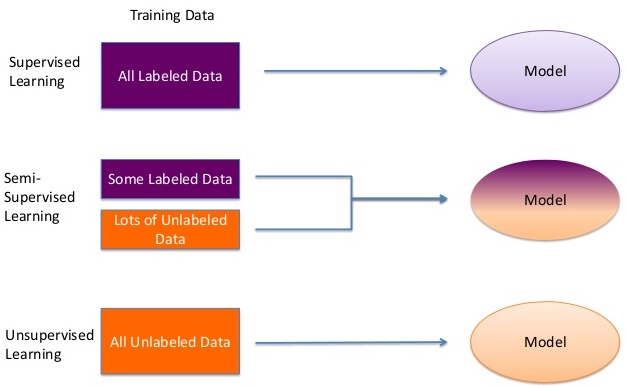

In [314]:
from IPython.display import Image
Image("semi_supervised_graph.jpg", width=500)

### Pseudo Labeling

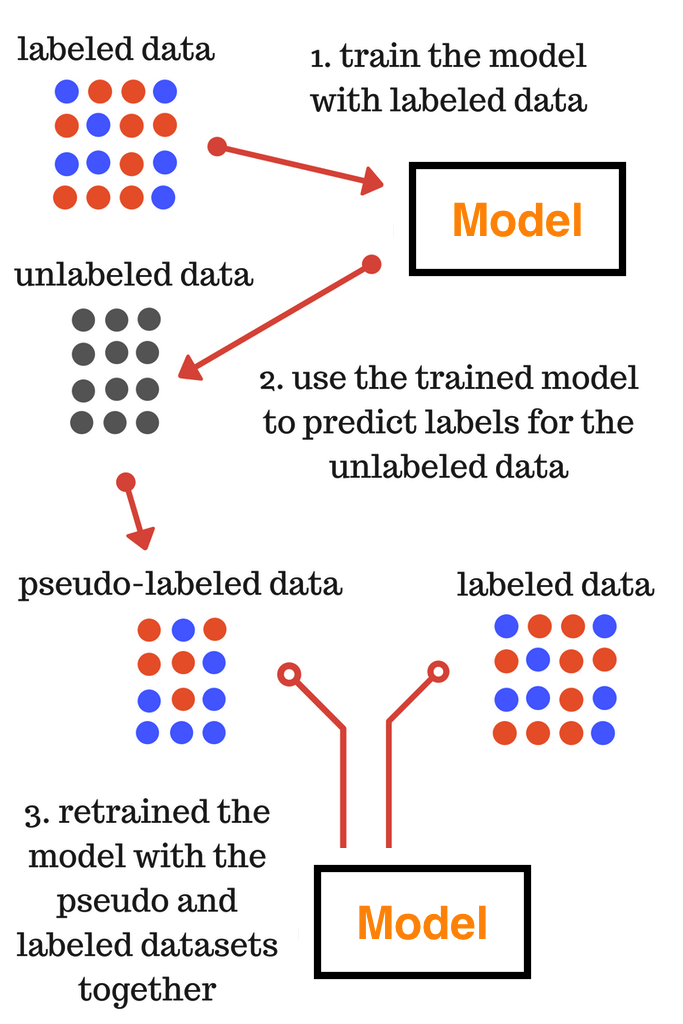

In [315]:
Image("pseudo_Labeling.jpg", width=300)

### Supervised Learning - Labeled Data

#### Training neural network on passwords classified by the strength values assigned to each password in the dataset

In [630]:
X = df_L_passwords_features_3
y = df_L_passwords['strength'].as_matrix().T

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [632]:
train_final_1 = X_train
label_train_final_1 = y_train

val_1 = X_test
label_val_1 = y_test

print("Train:", np.shape(train_final_1))
print("Validation:", np.shape(val_1))
print("Label Validation:", np.shape(label_val_1))
print("Label Train Final:", np.shape(label_train_final_1))

Train: (52183, 9)
Validation: (13046, 9)
Label Validation: (13046,)
Label Train Final: (52183,)


In [633]:
model_ANN_L_passwords_1 = models.Sequential()
model_ANN_L_passwords_1.add(layers.Dense(50, activation='relu', input_shape=(9,)))
model_ANN_L_passwords_1.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_1.add(layers.Dense(1, activation='sigmoid')) 

In [634]:
model_ANN_L_passwords_1.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [635]:
model_val = model_ANN_L_passwords_1.fit(train_final_1,
                    label_train_final_1,
                    epochs=40,
                    batch_size=256,
                    validation_data=(val_1, label_val_1))

Train on 52183 samples, validate on 13046 samples
Epoch 1/40
52183/52183 [==============================] - 1s 28us/step - loss: -1.0231 - acc: 0.7459 - val_loss: -1.2012 - val_acc: 0.7457
Epoch 2/40
52183/52183 [==============================] - 0s 8us/step - loss: -1.4067 - acc: 0.7460 - val_loss: -1.7143 - val_acc: 0.7457
Epoch 3/40
52183/52183 [==============================] - 0s 7us/step - loss: -1.8122 - acc: 0.8523 - val_loss: -1.8651 - val_acc: 0.8778
Epoch 4/40
52183/52183 [==============================] - 0s 7us/step - loss: -1.8661 - acc: 0.8783 - val_loss: -1.8862 - val_acc: 0.8782
Epoch 5/40
52183/52183 [==============================] - 0s 7us/step - loss: -1.8793 - acc: 0.8785 - val_loss: -1.8954 - val_acc: 0.8783
Epoch 6/40
52183/52183 [==============================] - 0s 8us/step - loss: -1.8850 - acc: 0.8787 - val_loss: -1.8988 - val_acc: 0.8784
Epoch 7/40
52183/52183 [==============================] - 0s 7us/step - loss: -1.8879 - acc: 0.8788 - val_loss: -1.9007 -

#### Results
88.07% accuracy

### Pseudo-Labelling - Using Trained Model to Predict Labels

In [416]:
df_UL_passwords_features_2 = df_UL_passwords.drop(columns=['password', 'count', 'unique_char', 
                                                  'longest_sequences'])

In [636]:
df_UL_passwords_features_3.columns

Index(['password_length', 'special_char', 'number_char', 'letter_char',
       '8_length_number', 'letter_upper', '8_length_letter_upper_lower',
       '8_length_letter_upper_lower_number', 'consecutive_sequence_5'],
      dtype='object')

### 1:1 Ratio of Labeled to Pseudo-Labeled

In this first step, we are going to work with a subset of the larger unlabeled dataset of equal size to the training data set of labeled data. We will use this as a testing data set as use our initial model, model_ANN_L_passwrods_1, to predict the password strengths of the unlabeled data set.

In [637]:
section_1_UL_features = df_UL_passwords_features_3[:52183]

In [638]:
pseudo_label_pwrd_strength_1 = model_ANN_L_passwords_1.predict(section_1_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [639]:
combined_train_label_pseudo_label = np.concatenate((label_train_final_1, pseudo_label_pwrd_strength_1), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [640]:
combined_train_test_features = np.concatenate((train_final_1, section_1_UL_features), axis=0)

Once we have combined the training data labels with our predicted pseudo labels and our training features with our testing features, we can run this amalgamation through our initial model as inputs.

#### Train the model with concatenated datasets as x and y inputs

In [641]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features, 
                                                    combined_train_label_pseudo_label, test_size=0.2, 
                                                    random_state=0)

In [642]:
train_final_2 = X_train
label_train_final_2 = y_train

val_2 = X_test
label_val_2 = y_test

print("Train:", np.shape(train_final_2))
print("Validation:", np.shape(val_2))
print("Label Validation:", np.shape(label_val_2))
print("Label Train Final:", np.shape(label_train_final_2))

Train: (83492, 9)
Validation: (20874, 9)
Label Validation: (20874,)
Label Train Final: (83492,)


In [643]:
model_ANN_L_passwords_2 = models.Sequential()
model_ANN_L_passwords_2.add(layers.Dense(50, activation='relu', input_shape=(9,)))
model_ANN_L_passwords_2.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_2.add(layers.Dense(1, activation='sigmoid')) 

In [644]:
model_ANN_L_passwords_2.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [645]:
history = model_ANN_L_passwords_2.fit(train_final_2,
                    label_train_final_2,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_2, label_val_2))

Train on 83492 samples, validate on 20874 samples
Epoch 1/20
83492/83492 [==============================] - 1s 14us/step - loss: 0.2494 - acc: 0.3804 - val_loss: -0.0168 - val_acc: 0.3761
Epoch 2/20
83492/83492 [==============================] - 1s 7us/step - loss: -0.5756 - acc: 0.4289 - val_loss: -0.8114 - val_acc: 0.4442
Epoch 3/20
83492/83492 [==============================] - 1s 7us/step - loss: -0.8421 - acc: 0.4463 - val_loss: -0.8317 - val_acc: 0.4442
Epoch 4/20
83492/83492 [==============================] - 1s 7us/step - loss: -0.8534 - acc: 0.4463 - val_loss: -0.8390 - val_acc: 0.4442
Epoch 5/20
83492/83492 [==============================] - 1s 7us/step - loss: -0.8575 - acc: 0.4463 - val_loss: -0.8414 - val_acc: 0.4442
Epoch 6/20
83492/83492 [==============================] - 1s 7us/step - loss: -0.8591 - acc: 0.4463 - val_loss: -0.8425 - val_acc: 0.4442
Epoch 7/20
83492/83492 [==============================] - 1s 7us/step - loss: -0.8601 - acc: 0.4463 - val_loss: -0.8428 - 

#### Analysis
44.46% accuracy - We observe a decline in classification accuracy when introducing a group of pseudo label data of equal size to our original labeled training data set. Let's see if this trend continues with another group of pseudo-labeled data based on this model's prediction ability.

### Round 2 - test new subset of unlabeled data

Now that we have created a new model learning from a combination of labeled data and pseudo labeled data, we try to evaluate its accuracy in predicted additional password strengths. We can test this iterative process with different size pseudo label data sets to optimize for classification accuracy.

In [646]:
print(len(combined_train_test_features))
print(len(combined_train_label_pseudo_label))

104366
104366


In [647]:
section_2_UL_features = df_UL_passwords_features_3[52183:156549]

In [648]:
pseudo_label_pwrd_strength_2 = model_ANN_L_passwords_2.predict(section_2_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [649]:
combined_train_label_pseudo_label_2 = np.concatenate((combined_train_label_pseudo_label, 
                                                    pseudo_label_pwrd_strength_2), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [650]:
combined_train_test_features_2 = np.concatenate((combined_train_test_features, section_2_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [651]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_2, 
                                                    combined_train_label_pseudo_label_2, test_size=0.2, 
                                                    random_state=0)

In [652]:
train_final_3 = X_train
label_train_final_3 = y_train

val_3 = X_test
label_val_3 = y_test

print("Train:", np.shape(train_final_3))
print("Validation:", np.shape(val_3))
print("Label Validation:", np.shape(label_val_3))
print("Label Train Final:", np.shape(label_train_final_3))

Train: (166985, 9)
Validation: (41747, 9)
Label Validation: (41747,)
Label Train Final: (166985,)


In [653]:
model_ANN_L_passwords_3 = models.Sequential()
model_ANN_L_passwords_3.add(layers.Dense(50, activation='relu', input_shape=(9,)))
model_ANN_L_passwords_3.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_3.add(layers.Dense(1, activation='sigmoid')) 

In [654]:
model_ANN_L_passwords_3.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [655]:
history = model_ANN_L_passwords_3.fit(train_final_3,
                    label_train_final_3,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_3, label_val_3))

Train on 166985 samples, validate on 41747 samples
Epoch 1/20
166985/166985 [==============================] - 2s 11us/step - loss: 0.1855 - acc: 0.2153 - val_loss: -0.3092 - val_acc: 0.2268
Epoch 2/20
166985/166985 [==============================] - 1s 8us/step - loss: -0.3269 - acc: 0.2282 - val_loss: -0.3396 - val_acc: 0.2268
Epoch 3/20
166985/166985 [==============================] - 1s 7us/step - loss: -0.3369 - acc: 0.2283 - val_loss: -0.3431 - val_acc: 0.2268
Epoch 4/20
166985/166985 [==============================] - 1s 8us/step - loss: -0.3390 - acc: 0.2283 - val_loss: -0.3444 - val_acc: 0.2268
Epoch 5/20
166985/166985 [==============================] - 1s 8us/step - loss: -0.3399 - acc: 0.2283 - val_loss: -0.3446 - val_acc: 0.2269
Epoch 6/20
166985/166985 [==============================] - 1s 8us/step - loss: -0.3405 - acc: 0.2283 - val_loss: -0.3455 - val_acc: 0.2269
Epoch 7/20
166985/166985 [==============================] - 1s 8us/step - loss: -0.3408 - acc: 0.2284 - val_l

#### Analysis
23.05% accuracy - We see a significant decline in classification accuracy when introducing an additional group of pseudo label data of equal size to our original labeled training data set. Let's start to experiment with different ratios of labeled to pseudo-labeled data to maximize the classification accuracy of our models.

### Round 3: 1:1/3 Ratio of Labeled to Pseudo-Labeled

Let's start back with our original model, model_ANN_L_passwords_1, and introduce a smaller subset of unlabeled data to predict pseudo-labels. Then we can proceed to train a new model based on the combination of labeled data and pseudo labels.

In [487]:
section_3_UL_features = df_UL_passwords_features_2[:17394]

In [488]:
pseudo_label_pwrd_strength_3 = model_ANN_L_passwords_1.predict(section_3_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [490]:
combined_train_label_pseudo_label_3 = np.concatenate((label_train_final_1, pseudo_label_pwrd_strength_3), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [493]:
combined_train_test_features_3 = np.concatenate((train_final_1, section_3_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [494]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_3, 
                                                    combined_train_label_pseudo_label_3, test_size=0.2, 
                                                    random_state=0)

In [496]:
train_final_3 = X_train
label_train_final_3 = y_train

val_3 = X_test
label_val_3 = y_test

print("Train:", np.shape(train_final_3))
print("Validation:", np.shape(val_3))
print("Label Validation:", np.shape(label_val_3))
print("Label Train Final:", np.shape(label_train_final_3))

Train: (55661, 14)
Validation: (13916, 14)
Label Validation: (13916,)
Label Train Final: (55661,)


In [497]:
model_ANN_L_passwords_3 = models.Sequential()
model_ANN_L_passwords_3.add(layers.Dense(50, activation='relu', input_shape=(14,)))
model_ANN_L_passwords_3.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_3.add(layers.Dense(1, activation='sigmoid')) 

In [498]:
model_ANN_L_passwords_3.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [499]:
history = model_ANN_L_passwords_3.fit(train_final_3,
                    label_train_final_3,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_3, label_val_3))

Train on 55661 samples, validate on 13916 samples
Epoch 1/20
55661/55661 [==============================] - 1s 24us/step - loss: -0.0658 - acc: 0.5647 - val_loss: -0.3278 - val_acc: 0.5653
Epoch 2/20
55661/55661 [==============================] - 0s 8us/step - loss: -0.9674 - acc: 0.6057 - val_loss: -1.3251 - val_acc: 0.6643
Epoch 3/20
55661/55661 [==============================] - 0s 6us/step - loss: -1.3701 - acc: 0.6655 - val_loss: -1.3550 - val_acc: 0.6643
Epoch 4/20
55661/55661 [==============================] - 0s 7us/step - loss: -1.3961 - acc: 0.6655 - val_loss: -1.3810 - val_acc: 0.6646
Epoch 5/20
55661/55661 [==============================] - 0s 7us/step - loss: -1.4067 - acc: 0.6655 - val_loss: -1.3861 - val_acc: 0.6646
Epoch 6/20
55661/55661 [==============================] - 0s 6us/step - loss: -1.4106 - acc: 0.6657 - val_loss: -1.3879 - val_acc: 0.6651
Epoch 7/20
55661/55661 [==============================] - 0s 7us/step - loss: -1.4121 - acc: 0.6659 - val_loss: -1.3886 -

#### Analysis
66.60% accuracy - Now we observe a decent classifcation accuracy resulting from this third model. The smaller subset of unlabeled data to predict password strengths for helped to increase our accuracy. But, we only used a small portion of the large data set. Can we aim to maximize the amount of data we introduce, while still accounting for accuracy?

### Round 4: 1:1/2 Ratio of Labeled to Pseudo-Labeled

Let's look at introducing an unlabeled dataset of 1/2 the size of our training data.

In [502]:
section_4_UL_features = df_UL_passwords_features_2[:26091]

In [503]:
pseudo_label_pwrd_strength_4 = model_ANN_L_passwords_1.predict(section_4_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [505]:
combined_train_label_pseudo_label_4 = np.concatenate((label_train_final_1, pseudo_label_pwrd_strength_4), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [507]:
combined_train_test_features_4 = np.concatenate((train_final_1, section_4_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [508]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_4, 
                                                    combined_train_label_pseudo_label_4, test_size=0.2, 
                                                    random_state=0)

In [510]:
train_final_4 = X_train
label_train_final_4 = y_train

val_4 = X_test
label_val_4 = y_test

print("Train:", np.shape(train_final_4))
print("Validation:", np.shape(val_4))
print("Label Validation:", np.shape(label_val_4))
print("Label Train Final:", np.shape(label_train_final_4))

Train: (62619, 14)
Validation: (15655, 14)
Label Validation: (15655,)
Label Train Final: (62619,)


In [511]:
model_ANN_L_passwords_4 = models.Sequential()
model_ANN_L_passwords_4.add(layers.Dense(50, activation='relu', input_shape=(14,)))
model_ANN_L_passwords_4.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_4.add(layers.Dense(1, activation='sigmoid')) 

In [512]:
model_ANN_L_passwords_4.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [513]:
history = model_ANN_L_passwords_4.fit(train_final_4,
                    label_train_final_4,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_4, label_val_4))

Train on 62619 samples, validate on 15655 samples
Epoch 1/20
62619/62619 [==============================] - 1s 12us/step - loss: -0.1585 - acc: 0.5064 - val_loss: -0.8245 - val_acc: 0.5082
Epoch 2/20
62619/62619 [==============================] - 0s 6us/step - loss: -1.1492 - acc: 0.5877 - val_loss: -1.2334 - val_acc: 0.5868
Epoch 3/20
62619/62619 [==============================] - 0s 7us/step - loss: -1.2263 - acc: 0.5955 - val_loss: -1.2509 - val_acc: 0.5873
Epoch 4/20
62619/62619 [==============================] - 0s 6us/step - loss: -1.2359 - acc: 0.5955 - val_loss: -1.2561 - val_acc: 0.5873
Epoch 5/20
62619/62619 [==============================] - 0s 6us/step - loss: -1.2390 - acc: 0.5956 - val_loss: -1.2580 - val_acc: 0.5873
Epoch 6/20
62619/62619 [==============================] - 0s 6us/step - loss: -1.2405 - acc: 0.5956 - val_loss: -1.2595 - val_acc: 0.5873
Epoch 7/20
62619/62619 [==============================] - 1s 9us/step - loss: -1.2415 - acc: 0.5956 - val_loss: -1.2604 -

#### Analysis
59.57% accuracy - So, we introduced a larger data set and see a small decrease in our classification accuracy from 66.6% to 59.57% but we increased our data by 2/3. In context, I see that as a worthy trade-off. But let's continue with our third model, model_ANN_L_passwords_3, and see what happens when we introduce another subset of unlabeled data (again 1/3 the size of the original training data set).

### Round 5: 1:1/3 Ratio of Labeled to Pseudo-Labeled

Further testing our third model, model_ANN_L_passwords_3, let's concatenate another unlabeled data set.

In [516]:
section_5_UL_features = df_UL_passwords_features_2[17394:34788]

In [517]:
pseudo_label_pwrd_strength_5 = model_ANN_L_passwords_3.predict(section_5_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [519]:
combined_train_label_pseudo_label_5 = np.concatenate((label_train_final_3, pseudo_label_pwrd_strength_5), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [521]:
combined_train_test_features_5 = np.concatenate((train_final_3, section_5_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [522]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_5, 
                                                    combined_train_label_pseudo_label_5, test_size=0.2, 
                                                    random_state=0)

In [524]:
train_final_5 = X_train
label_train_final_5 = y_train

val_5 = X_test
label_val_5 = y_test

print("Train:", np.shape(train_final_5))
print("Validation:", np.shape(val_5))
print("Label Validation:", np.shape(label_val_5))
print("Label Train Final:", np.shape(label_train_final_5))

Train: (58444, 14)
Validation: (14611, 14)
Label Validation: (14611,)
Label Train Final: (58444,)


In [525]:
model_ANN_L_passwords_5 = models.Sequential()
model_ANN_L_passwords_5.add(layers.Dense(50, activation='relu', input_shape=(14,)))
model_ANN_L_passwords_5.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_5.add(layers.Dense(1, activation='sigmoid')) 

In [526]:
model_ANN_L_passwords_5.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [527]:
history = model_ANN_L_passwords_5.fit(train_final_5,
                    label_train_final_5,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_5, label_val_5))

Train on 58444 samples, validate on 14611 samples
Epoch 1/20
58444/58444 [==============================] - 1s 16us/step - loss: 0.1642 - acc: 0.4329 - val_loss: -0.1016 - val_acc: 0.4352
Epoch 2/20
58444/58444 [==============================] - 0s 7us/step - loss: -0.6790 - acc: 0.4729 - val_loss: -1.0115 - val_acc: 0.5124
Epoch 3/20
58444/58444 [==============================] - 0s 8us/step - loss: -1.0435 - acc: 0.5116 - val_loss: -1.0374 - val_acc: 0.5124
Epoch 4/20
58444/58444 [==============================] - 0s 6us/step - loss: -1.0569 - acc: 0.5116 - val_loss: -1.0448 - val_acc: 0.5124
Epoch 5/20
58444/58444 [==============================] - 0s 6us/step - loss: -1.0615 - acc: 0.5117 - val_loss: -1.0483 - val_acc: 0.5124
Epoch 6/20
58444/58444 [==============================] - 0s 6us/step - loss: -1.0641 - acc: 0.5117 - val_loss: -1.0503 - val_acc: 0.5125
Epoch 7/20
58444/58444 [==============================] - 0s 6us/step - loss: -1.0657 - acc: 0.5117 - val_loss: -1.0523 - 

#### Analysis
51.18% accuracy - So, we introduced another new set of data (of 1/3 the size of our training data) and see a small decrease in our classification accuracy from 66.6% to 51.18% but we increased our data by 2/3. In context, I see that as a worthy trade-off. But let's continue with our thrid model, model_ANN_L_passwords_3, and see what happens when we introduce another subset of unlabeled data (again 1/3 the size of the original training data set).

### Round 6: 1:1/4 Ratio of Labeled to Pseudo-Labeled

In [656]:
section_6_UL_features = df_UL_passwords_features_3[:8697]

In [657]:
pseudo_label_pwrd_strength_6 = model_ANN_L_passwords_1.predict(section_6_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [658]:
combined_train_label_pseudo_label_6 = np.concatenate((label_train_final_1, pseudo_label_pwrd_strength_6), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [659]:
combined_train_test_features_6 = np.concatenate((train_final_1, section_6_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [660]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_6, 
                                                    combined_train_label_pseudo_label_6, test_size=0.2, 
                                                    random_state=0)

In [661]:
train_final_6 = X_train
label_train_final_6 = y_train

val_6 = X_test
label_val_6 = y_test

print("Train:", np.shape(train_final_6))
print("Validation:", np.shape(val_6))
print("Label Validation:", np.shape(label_val_6))
print("Label Train Final:", np.shape(label_train_final_6))

Train: (48704, 9)
Validation: (12176, 9)
Label Validation: (12176,)
Label Train Final: (48704,)


In [662]:
model_ANN_L_passwords_6 = models.Sequential()
model_ANN_L_passwords_6.add(layers.Dense(50, activation='relu', input_shape=(9,)))
model_ANN_L_passwords_6.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_6.add(layers.Dense(1, activation='sigmoid')) 

In [663]:
model_ANN_L_passwords_6.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [664]:
history = model_ANN_L_passwords_6.fit(train_final_6,
                    label_train_final_6,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_6, label_val_6))

Train on 48704 samples, validate on 12176 samples
Epoch 1/20
48704/48704 [==============================] - 1s 19us/step - loss: -0.3638 - acc: 0.6427 - val_loss: -0.5023 - val_acc: 0.6363
Epoch 2/20
48704/48704 [==============================] - 0s 7us/step - loss: -0.8657 - acc: 0.6427 - val_loss: -1.2645 - val_acc: 0.6365
Epoch 3/20
48704/48704 [==============================] - 0s 8us/step - loss: -1.4914 - acc: 0.7398 - val_loss: -1.5238 - val_acc: 0.7534
Epoch 4/20
48704/48704 [==============================] - 0s 8us/step - loss: -1.5725 - acc: 0.7567 - val_loss: -1.5491 - val_acc: 0.7534
Epoch 5/20
48704/48704 [==============================] - 0s 7us/step - loss: -1.5894 - acc: 0.7567 - val_loss: -1.5603 - val_acc: 0.7534
Epoch 6/20
48704/48704 [==============================] - 0s 7us/step - loss: -1.5975 - acc: 0.7567 - val_loss: -1.5653 - val_acc: 0.7534
Epoch 7/20
48704/48704 [==============================] - 0s 8us/step - loss: -1.6012 - acc: 0.7567 - val_loss: -1.5676 -

#### Analysis
75.72% accuracy - Reducing the unlabeled data set to 1/4 the size of the training data set increases our accuracy up to 75.89%. Our highest classification accuracy to date. This model is performing well, let's continue forward with model_ANN_L_passwords_6 and add more data.

### Round 7: 1:1/4 Ratio of Labeled to Pseudo-Labeled

Let's take another subset of unlabeled data.

In [665]:
section_7_UL_features = df_UL_passwords_features_3[8697:17394]

In [666]:
pseudo_label_pwrd_strength_7 = model_ANN_L_passwords_6.predict(section_7_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [667]:
combined_train_label_pseudo_label_7 = np.concatenate((label_train_final_6, pseudo_label_pwrd_strength_7), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [668]:
combined_train_test_features_7 = np.concatenate((train_final_6, section_7_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [669]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_7, 
                                                    combined_train_label_pseudo_label_7, test_size=0.2, 
                                                    random_state=0)

In [670]:
train_final_7 = X_train
label_train_final_7 = y_train

val_7 = X_test
label_val_7 = y_test

print("Train:", np.shape(train_final_7))
print("Validation:", np.shape(val_7))
print("Label Validation:", np.shape(label_val_7))
print("Label Train Final:", np.shape(label_train_final_7))

Train: (45920, 9)
Validation: (11481, 9)
Label Validation: (11481,)
Label Train Final: (45920,)


In [671]:
model_ANN_L_passwords_7 = models.Sequential()
model_ANN_L_passwords_7.add(layers.Dense(50, activation='relu', input_shape=(9,)))
model_ANN_L_passwords_7.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_7.add(layers.Dense(1, activation='sigmoid')) 

In [672]:
model_ANN_L_passwords_7.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [673]:
history = model_ANN_L_passwords_7.fit(train_final_7,
                    label_train_final_7,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_7, label_val_7))

Train on 45920 samples, validate on 11481 samples
Epoch 1/20
45920/45920 [==============================] - 1s 20us/step - loss: 0.0028 - acc: 0.5459 - val_loss: -0.1316 - val_acc: 0.5517
Epoch 2/20
45920/45920 [==============================] - 0s 8us/step - loss: -0.7069 - acc: 0.5646 - val_loss: -1.1033 - val_acc: 0.6493
Epoch 3/20
45920/45920 [==============================] - 0s 8us/step - loss: -1.2733 - acc: 0.6408 - val_loss: -1.2002 - val_acc: 0.6496
Epoch 4/20
45920/45920 [==============================] - 0s 8us/step - loss: -1.3167 - acc: 0.6422 - val_loss: -1.2256 - val_acc: 0.6496
Epoch 5/20
45920/45920 [==============================] - 0s 8us/step - loss: -1.3349 - acc: 0.6422 - val_loss: -1.2407 - val_acc: 0.6493
Epoch 6/20
45920/45920 [==============================] - 0s 8us/step - loss: -1.3443 - acc: 0.6423 - val_loss: -1.2485 - val_acc: 0.6496
Epoch 7/20
45920/45920 [==============================] - 0s 8us/step - loss: -1.3489 - acc: 0.6424 - val_loss: -1.2526 - 

#### Analysis
64.28% accuracy - Our model is still performing quite well against this new test data as input, however we do see a dropoff in performance. Let's try one more round to evaluate the performance impact.

### Round 8: 1:1/4 Ratio of Labeled to Pseudo-Labeled

Again we grab a subset of unlabeled data to predict our pseudo labels.

In [674]:
section_8_UL_features = df_UL_passwords_features_3[17394:26091]

In [675]:
pseudo_label_pwrd_strength_8 = model_ANN_L_passwords_7.predict(section_8_UL_features).reshape(-1)

#### Concatenate training labels with the test set pseudo-labels

In [676]:
combined_train_label_pseudo_label_8 = np.concatenate((label_train_final_7, pseudo_label_pwrd_strength_8), axis=0)

#### Concatenate the features of the training set with the features of the test set

In [677]:
combined_train_test_features_8 = np.concatenate((train_final_7, section_8_UL_features), axis=0)

#### Train the model with concatenated datasets as x and y inputs

In [678]:
X_train, X_test, y_train, y_test = train_test_split(combined_train_test_features_8, 
                                                    combined_train_label_pseudo_label_8, test_size=0.2, 
                                                    random_state=0)

In [679]:
train_final_8 = X_train
label_train_final_8 = y_train

val_8 = X_test
label_val_8 = y_test

print("Train:", np.shape(train_final_8))
print("Validation:", np.shape(val_8))
print("Label Validation:", np.shape(label_val_8))
print("Label Train Final:", np.shape(label_train_final_8))

Train: (43693, 9)
Validation: (10924, 9)
Label Validation: (10924,)
Label Train Final: (43693,)


In [680]:
model_ANN_L_passwords_8 = models.Sequential()
model_ANN_L_passwords_8.add(layers.Dense(50, activation='relu', input_shape=(9,)))
model_ANN_L_passwords_8.add(layers.Dense(25, activation='relu'))
model_ANN_L_passwords_8.add(layers.Dense(1, activation='sigmoid')) 

In [681]:
model_ANN_L_passwords_8.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [682]:
history = model_ANN_L_passwords_8.fit(train_final_8,
                    label_train_final_8,
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_8, label_val_8))

Train on 43693 samples, validate on 10924 samples
Epoch 1/20
43693/43693 [==============================] - 1s 21us/step - loss: 0.2522 - acc: 0.4586 - val_loss: 0.1671 - val_acc: 0.4588
Epoch 2/20
43693/43693 [==============================] - 0s 7us/step - loss: -0.0347 - acc: 0.4614 - val_loss: -0.2835 - val_acc: 0.4589
Epoch 3/20
43693/43693 [==============================] - 0s 9us/step - loss: -0.7954 - acc: 0.5132 - val_loss: -1.0044 - val_acc: 0.5399
Epoch 4/20
43693/43693 [==============================] - 0s 9us/step - loss: -1.0836 - acc: 0.5424 - val_loss: -1.0314 - val_acc: 0.5399
Epoch 5/20
43693/43693 [==============================] - 0s 9us/step - loss: -1.1028 - acc: 0.5424 - val_loss: -1.0503 - val_acc: 0.5400
Epoch 6/20
43693/43693 [==============================] - 0s 9us/step - loss: -1.1126 - acc: 0.5424 - val_loss: -1.0569 - val_acc: 0.5400
Epoch 7/20
43693/43693 [==============================] - 0s 8us/step - loss: -1.1174 - acc: 0.5424 - val_loss: -1.0587 - v

#### Analysis
54.27% accuracy - Our third subset of data brings the accuracy down to 54.27% for the data as a whole. A steep dropoff from our original 88.07%, 75.72%, 64.28%, and now 54.27%. Unfortunately that is only 26,091 observations of the total 677,568 data points in our unlabeled data set. If this trend continues, we will soon exceed the 50% threshold followed by 33%. At which point, simply guessing will yield better results.

# iNterpretting the Results

| Model | Initial Model | Test Accuracy | Prediction Accuracy |Ratio of Labeled:Unlabeled| Number of Classified Observations |
|------|------|------|------|------|------|
| Logistic Regression | N/A | 100% | 40% | N/A | 131,068 |
| Random Forest | N/A | 100% | 40% | N/A | 131,068 |
|XGBoost | N/A | 100% | 40%| N/A | 131,068 |
|model_ANN_L_passwords_1| model_ANN_L_passwords_1 | 88.07% | 44.46% | N/A | 131,068 |
|model_ANN_L_passwords_2| model_ANN_L_passwords_1 | 88.07% | 23.05% | 1:1 | 169,900 |
|model_ANN_L_passwords_3| model_ANN_L_passwords_1 | 88.07% | 66.60% | 1:1/3 | 82,928 |
|model_ANN_L_passwords_4| model_ANN_L_passwords_1 | 88.07% | 59.57% | 1:1/2 | 91,625 |
|model_ANN_L_passwords_3| model_ANN_L_passwords_3 | 66.60% | 51.18% | 1:1/3 | 82,928 |
|model_ANN_L_passwords_6| model_ANN_L_passwords_1 | 88.07% | 75.72% | 1:1/4 | 74,231 |
|model_ANN_L_passwords_7| model_ANN_L_passwords_6 | 75.72% | 64.28% | 1:1/4 | 131,068 |
|model_ANN_L_passwords_8| model_ANN_L_passwords_6 | 64.28% | 54.27% | 1:1/4 | 91,625 |

## What did we learn?

After iterating through a number of model development and evaluation cycles, we can determine that as we attempt to classify more and more new data, we will continue to see the accuracy of our models decline. Unfortunately, the patterns that the models are deriving from the given features are not creating significant correlations to better predict the strength of a password established by the system that created our labeled data set.

Applying machine learning algorithms to classify password strength is hard!

We may want to revisit the feature extraction process in order to add additional fields and more data for our models to find and connect patterns leading to more accurate classification.

Innovations in the fields of security - authentication and authorization - will need to focus on passwordless protocols and procedures in order to remove the human cognition and lazy tendencies of users impacting levels of security.

After analyzing a large set of passwords, it is clear that this form of authentication is flawed and puts too much responsibility on the user in order to attain a high level of security. We must look to introduce new methods of security that remove the user participation from the equation!
- Biometrics-based Authentication
- Multi-factor Authentication
- Behavior-based Continuous Authentication
- Blockchain Technologies
- Quantum Technologies